# Credit Card Fraud Detection

**Steps:**
1. Upload data

2. Concating the Train & Test Datasets for preprocessing

3. Explore the structure of the DataSet

4. Data Cleaning

5. Feature Extraction

6. Variable Analysis and Visualization

7. Data Preprocessing

8. Resampling for Modeling

9. Building Machine Learning Models

## Import the usual libraries to startwith

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

Read data


In [ ]:
train_file_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/FRAUD/fraudTrain.csv'
test_file_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/FRAUD/fraudTest.csv'

train_data = pd.read_csv(train_file_path) # reading the train data
test_data = pd.read_csv(test_file_path) # reading the test data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PROJECTS/Fraud_detection/FRAUD/fraudTrain.csv'

In [ ]:
# lets check the length train and test datasets
# train-test split is already taken place in the dataset level itself

a = len(train_data)
b = len(test_data)

print('Number of records in the train dataset : ',a)
print('Number of records in the test dataset : ',b)
print('Train vs Test ratio : ', 100 - 100*round(b/a,1),'% : ',100*round(b/a,1),'%')

Number of records in the train dataset :  1296675
Number of records in the test dataset :  555719
Train vs Test ratio :  60.0 % :  40.0 %


### 2.Concating the Train & Test Datasets for preprocessing

First, we will concatenate the train and test datasets for `data cleaning and data preperations` then once the dataset is reday for modeiling, `we will split the dataset back to train and test besed on the above label`



In [ ]:
# creating the test and train label in the respective datasets, so that we can split the train test data set after completing the data-cleaning steps

train_data['split_label'] = 'train'
test_data['split_label'] = 'test'

> 2.1.Concating the train and test datasets

In [ ]:
# concating the train and the test data

data = pd.concat([train_data,test_data], axis = 0)
data.shape

(1852394, 24)

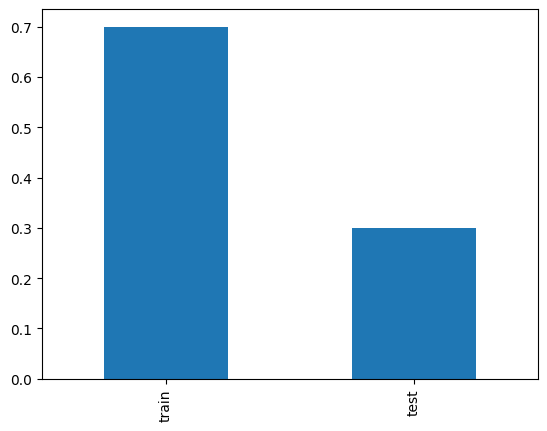

In [ ]:
# lets visualise the proportion of the train-test dataset

data['split_label'].value_counts(normalize = True).plot(kind = 'bar');

### 3.Inspecting the structure of the DataSet

- 3.1 understand the shape of the dataset
- 3.2 check the datatypes of the columns
- 3.3 check any missing values are present in the dataset
- 3.4 look at the head of the dataframe
- 3.5 inspect the target variable distribution

> **3.1 - Understand the shape of the dataset**

In [ ]:
data.shape

(1852394, 24)

> **3.2 - Check the datatype of the columns**


**Data Dictionary**


`trans_date_trans_time `: Transaction time stamp


`cc_num`: Credit card number


`merchant`: merchant name


`category` : transaction category


`amt`: Transaction amount


`first`: First name of card holder


`last` : Last name of card holder


`gender` : Sex of card holder


`street` : transaction address


`city` : transaction city


`state` : transaction state


`zip` : transaction zipcode


`lat` : transaction lattitude


`long` : transaction longitude


`city_pop` : Population of the city


`job `: job of the card holder


`dob` : date of birth of card holder


`trans_num` : transaction number of transaction


`unix_time` : time in unix format


`merch_lat` : lattitude of the merchant


`merch_long` : longitude of merchant


`is_fraud`: nature of transaction (fraud or not fraud)


In [ ]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
split_label               object
dtype: object

> **3.3 - Check the missing values in the dataset**

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split_label              0
dtype: int64

> **3.4 - look at the head of the datsaframe**

In [ ]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split_label
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train


In [ ]:
data.select_dtypes('int').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,Unnamed: 0,cc_num,zip,city_pop,unix_time,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
min,0.000000e+00,6.041621e+10,1.257000e+03,2.300000e+01,1.325376e+09,0.000000e+00
max,1.296674e+06,4.992346e+18,9.992100e+04,2.906700e+06,1.388534e+09,1.000000e+00
mad,3.115723e+05,7.539358e+17,2.308927e+04,1.372526e+05,1.580881e+07,1.036574e-02
mean,5.371934e+05,4.173860e+17,4.881326e+04,8.864367e+04,1.358674e+09,5.210015e-03
median,4.630980e+05,3.521417e+15,4.817400e+04,2.443000e+03,1.357089e+09,0.000000e+00
quantile,4.630980e+05,3.521417e+15,4.817400e+04,2.443000e+03,1.357089e+09,0.000000e+00
kurt,-9.616282e-01,6.175356e+00,-1.096054e+00,3.757285e+01,-1.199579e+00,1.869438e+02
skew,4.539899e-01,2.851074e+00,7.894965e-02,5.590805e+00,-1.973568e-02,1.374567e+01
var,1.346237e+11,1.713783e+36,7.226336e+08,9.089478e+10,3.310610e+14,5.182873e-03


> **3.5 - Inspect the target variable distribution**

,count,distribution
genuine,1842743,99.478999
fraud,9651,0.521001


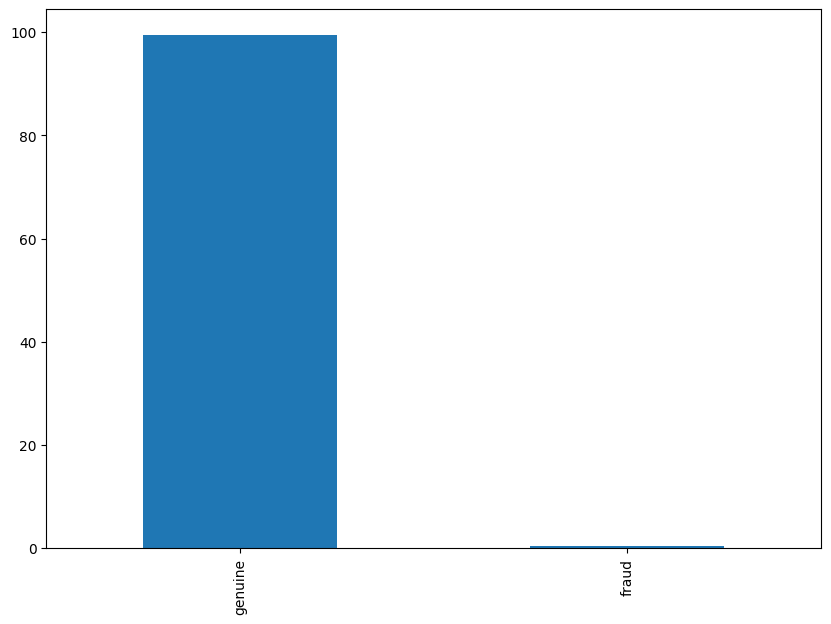

In [ ]:
a = data['is_fraud'].value_counts().rename('count')
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution')
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

**Observations:**

- There are `24 columns` in the dataframe (including the `unnamed 0` and `split-label` columns)
- Target varible is `is_fraud`
- Some of the variables `reqires type-casting` before further proceeding, for example `trans_date_trans_time` and `dob` are currently string-columns which need to be type-casted to pandas datetime object
- No null values present in the dataset


- The dataset id `Severely imbalanced`, hence there is a class imbalance problem
- The majority class, the `non-fraud` class contributes about 99.43 %
- The minority class, in this case the positive class `fraud` contributes only `0.52%`

**Solutiions** :

- we should involve nesecceary proceses to mitigate the class imbalance problem like `SMOTE`
- Choose the right metric for evaluating the model
- In the given context, any random model can predict the classes with 99 % accuracy, hence `accuracy is not the right metric` to evaluate the model, we should go for the `roc_auc` instead , which is the measureof `TruePostive` and `TrueNegative`.


## 4.Data Cleaning

- 4.1 Drop the duplicate records in the train dataset
- 4.2 Type cast the varibles wherever required
- 4.3 Lets check the cardinality of the category columns
- 4.4 Transform the the categprical columns to reduce the cadinality
- 4.5 Select and drop the reduntant columns

> **4.1 - Drop the duplicated records**

In [ ]:
# check for the duplicated records.
data.duplicated().sum()

0

no records are found to be dupicated, so that to be dropped

> **4.2 - Type cast the necessary variables**

In [ ]:
# trans_date_trans_time to pandas datetime

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(3)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
Name: trans_date_trans_time, dtype: datetime64[ns]

In [ ]:
# dob to pandas datetime

data['dob'] = pd.to_datetime(data['dob'])
data['dob'].head(3)

0   1988-03-09
1   1978-06-21
2   1962-01-19
Name: dob, dtype: datetime64[ns]

> **4.3 - Lets look at the cardinality of the varibles in the dataframe**

In [ ]:
cat_cols = data.select_dtypes(include = 'object').columns

for col in cat_cols:

  data[col] = data[col].str.lower().str.strip()

data[cat_cols].nunique().sort_values()

gender               2
split_label          2
category            14
state               51
first              355
last               486
job                497
merchant           693
city               906
street             999
trans_num      1852394
dtype: int64

> **4.4 Choosing the columns to be Dropped**

- indexes/record id's
- customer labels such as name, job ( job is highly cardinal cannot be grouped)
- merchant labels such as merchant name
- other categorical columns with high cadinalities which cannot be grouped / cannot be encoded

In [ ]:
drop_cols = ['Unnamed: 0','street','merchant','zip','first','last','trans_num','job']
data.drop(drop_cols, axis =1, inplace = True)
list(data.columns) # printing the remaining columns after dropping

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'split_label']

We are Keeping some columns to columns to be dropped later on after the feature extraction

# 5. Feature Extraction

- 5.1. Extract features from `trans_date_trans_time`
- 5.2. Extract features from `unix_time`
- 5.3. Extract features from `dob`
- 5.4. Extract features from `merchant lat-long` and `card holder lat-long`
- 5.5. Delete the reduntant features after feature extraction



> **5.1 Features from `trans_date_trans_time`**

- `transaction_hour`
- `transaction_month`
- `*transaction_dayname*`


In [ ]:
# extract the transaction hour column

data['trans_hour'] = data['trans_date_trans_time'].dt.hour

data['trans_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# extract transaction month column

data['trans_month'] = data['trans_date_trans_time'].dt.month

data['trans_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# the extract the boolean if the date of transaction is weekend or not

data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_name()

data['trans_dayofweek'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

> **5.2 Features from `unix_time`**

>  unitx time is the date and time representation widely used in computing. It measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, the beginning of the Unix (Unix OS) epoch.

- calculate the `time delay between the previouse and currant transaction`

In [ ]:
# Summary of the credit card transactions

data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     999
mean     1854
std      1175
min         6
25%       740
50%      1471
75%      2917
max      4392
Name: cc_num, dtype: int64

> **deduction :**

- There are 999 recorded credit cards transaction
- Each credict card has been utilised mutiple times (each credit card number appears approximately 1854 times in the dataset.)
- min - 6 times, at least one credit card number appears only 6 times, max - 4392 times, at least one credit card number appears 4392 times.
- the standard deviation is 1175, indicating a relatively high variation in the frequency of occurrence for different credit card numbers.
- Hence it is important to understand the delay betweem the previouse transaction and the current transaction for a credit cards in each record

In [ ]:
# sort the dataframe on transaction datetime & cc_num

data.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [ ]:
# unix_time for the previouse transaction using the shift method in pandas

data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)

In [ ]:
# For the first transactions-records all the credit cards, the previouse unit time will be null
# we dont want any null values to be present in the variable
# we will fill the rows with null values with (the current unit time value - 86400 (number of seconds in a day))

data['unix_time_prev_trans'].fillna(data['unix_time'] - 86400, inplace = True)

In [ ]:
# calculatig the time delay between the previouse and current transaction - converting the variable into to mins

data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60

> **5.3 Features from dob**

- Age of the card holder

In [ ]:
# lets look the variable

data['dob'].head()

1017   1986-02-17
2724   1986-02-17
2726   1986-02-17
2882   1986-02-17
2907   1986-02-17
Name: dob, dtype: datetime64[ns]

> calculating the age at the date of the transaction = `dob` - `trans_date_trans_time`

In [ ]:
data['cust_age'] = (data['trans_date_trans_time'] - data['dob']).astype('timedelta64[Y]') # calculting the age in days and converting it into years

data['cust_age'].head() # lets look at the newly arrived age column

1017    32.0
2724    32.0
2726    32.0
2882    32.0
2907    32.0
Name: cust_age, dtype: float64

> **5.4 Features from `merchant lat-log` and `card holder lat-long`**

- lat distance between the customer location and merchant location
- long distance between the customer location and merchant location
- lat distance between the current merchant location and the previous merchant location
- long distance between the current merchant location and the previous merchant location

> Calculate the lat distance between the customer and current merchant

In [ ]:
data['lat_dist_cust_merch'] = (data['lat'] -data['merch_lat']).abs()
data['lat_dist_cust_merch'].head(3)

1017    0.969911
2724    0.986034
2726    0.043465
Name: lat_dist_cust_merch, dtype: float64

> Calculate the long distance between the customer and current merchant

In [ ]:
data['long_dist_cust_merch'] = (data['long'] -data['merch_long']).abs()
data['long_dist_cust_merch'].head(3)

1017    0.845504
2724    0.147772
2726    0.261164
Name: long_dist_cust_merch, dtype: float64

> Get the lat and long values of the previouse merchant

In [ ]:
data['prev_merch_lat'] = data.groupby(by = ['cc_num'])['merch_lat'].shift(1) # latitude of the previouse merchant with pandas shift method

data['prev_merch_long'] = data.groupby(by = ['cc_num'])['merch_long'].shift(1) # longitude of the previouse merchant with pandas shift method

> Fill the null values with the lat long values of the current merchant

In [ ]:
data['prev_merch_lat'].fillna(data['merch_lat'], inplace = True)

data['prev_merch_long'].fillna(data['merch_long'], inplace = True)

> Calculate the distnace between the current and the previouse merchant

In [ ]:
data['lat_dist_prev_merch'] = (data['merch_lat'] - data['prev_merch_lat']).abs()

data['lat_dist_prev_merch'].head(3)

1017    0.000000
2724    1.955945
2726    0.942569
Name: lat_dist_prev_merch, dtype: float64

> Calculate the distnace between the current and the previouse merchant

In [ ]:
data['long_dist_prev_merch'] = (data['merch_long'] -data['prev_merch_long']).abs()

data['long_dist_prev_merch'].head(3)

1017    0.000000
2724    0.697732
2726    0.113392
Name: long_dist_prev_merch, dtype: float64

> **5.5 Delete the redundant Features / Columns**

- `trans_date_trans_time`
- `cc_num`
- `unix_time`
- `unix_time_prev_trans`
- `dob`
- `lat`
- `long`
- `merch_lat`
- `merch_long`
- `prev_merch_lat`
- `prev_merch_long`

In [ ]:
# columns to be dropped

drop_cols2 = ['trans_date_trans_time','cc_num','unix_time','unix_time_prev_trans','lat',
              'long','merch_lat','merch_long','prev_merch_lat','prev_merch_long','dob','city']

> Dropping the list of columns which are now redundant in the dataset

In [ ]:
data.drop(drop_cols2, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns)

['category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'is_fraud',
 'split_label',
 'trans_hour',
 'trans_month',
 'trans_dayofweek',
 'timedelta_last_trans',
 'cust_age',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

### 6.Variable Analysis and Visualization


In [ ]:
all_trans = data.copy()

all_trans['class'] = all_trans['is_fraud'].map({1:'Fraud',0:'Non_Fraud'})
normal = all_trans[data['is_fraud'] == 0]
fraud = all_trans[data['is_fraud'] == 1]

> **6.1 create functions for peformimg the analysis**

- function to show simple stats by class
- function to show simple stats by variable
- function plot the box plots
- function to normaize the count by the class

> Function to show simple stats by class

In [ ]:
def stats_by_class(variable):
  stat_grid = all_trans.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
  stat_grid = stat_grid.transpose().round(2)
  return stat_grid

> Fuction to show simple stats by variable

In [ ]:
def stats_by_var(variable):

  n = (normal[variable].value_counts(normalize = True)*100).round(2).rename('normal')
  f = (fraud[variable].value_counts(normalize = True)*100).round(2).rename('fraud')
  return pd.concat([n,f], axis = 1).transpose()

> Functing for plotting the boxplot

In [ ]:
def plot_box (data, x, y, title , width = 10, height = 7):

  plt.figure(figsize = [width,height])
  sns.boxplot(data = data, x = x, y = y)
  plt.title(title);

> Function for plotting the normalized the count by class

In [ ]:
def normalize_count_by_class(variable, width = 20, height = 7):

  plt.figure(figsize = [width,height])

  normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index()

  normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index()

  plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                             normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()

  sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
  plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
  plt.xticks(rotation = 30);

  summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index()

  summary_table.columns = [variable, 'normal', 'fraud']

  summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])

  summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)

  del normalized_normal,normalized_fraud,plot_table

  print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')

  return summary_table

In [ ]:

plt.style.use('ggplot')

> **6.3 Visualizations and Inferences**

> **6.3.A ) `is_fraud` Class Distribution**

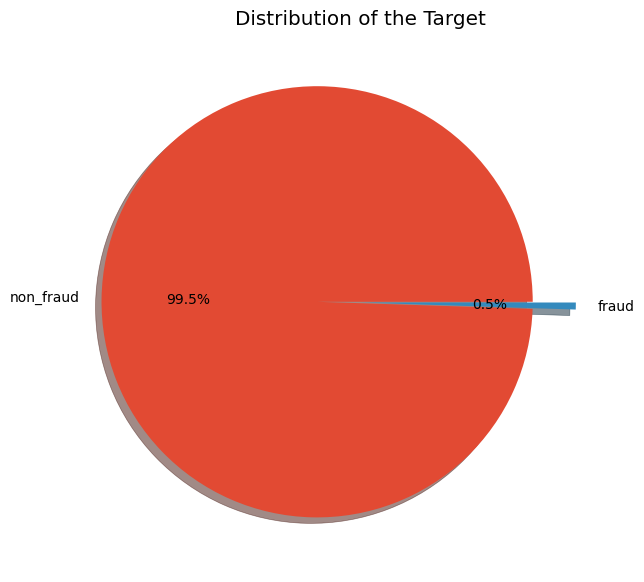

In [ ]:
plt.figure(figsize = [7,7])
plot_var = all_trans['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'],
        explode = [0.2, 0],
        shadow = True)
plt.title('Distribution of the Target');

**Inference :**

- The classes are highly imbalanced, 99.5 % of the class belongs to normal transactions, and only 0.5 % contributes to the fraud transaction.

> **6.3.B ) `Gender` of the card holder by class**

,f,m
normal,54.80,45.20
fraud,50.76,49.24


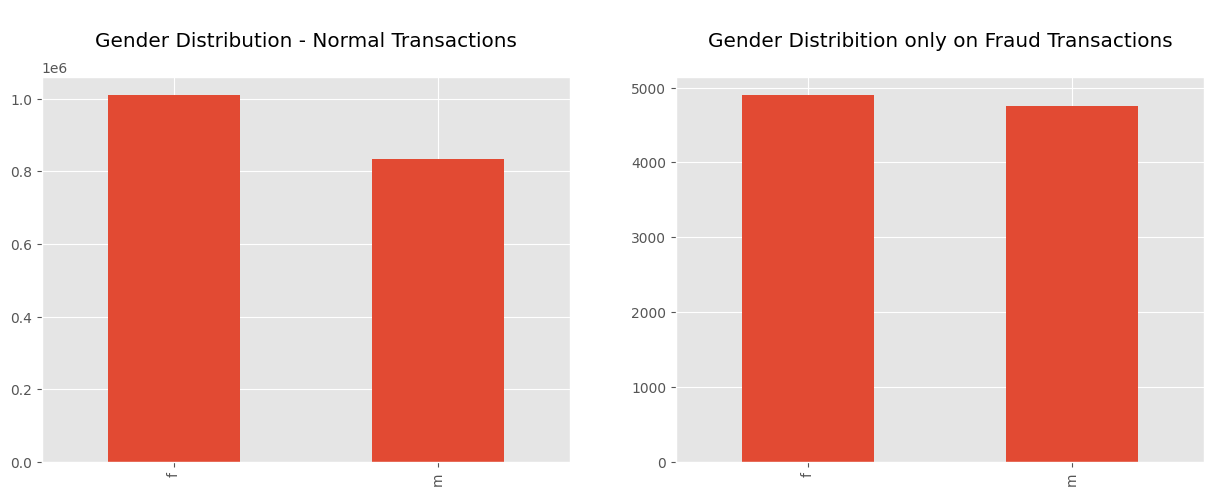

In [ ]:

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
normal['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribution - Normal Transactions\n')


plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribition only on Fraud Transactions\n');

stats_by_var('gender')

**Observation :**

- The fraud transaction is similarly distributed amoung male and female card holders.

> **6.3.C ) `Age` of the Card Holder**

class,Fraud,Non_Fraud
amin,14.00,13.00
amax,95.00,96.00
mean,48.33,45.75
median,47.00,44.00


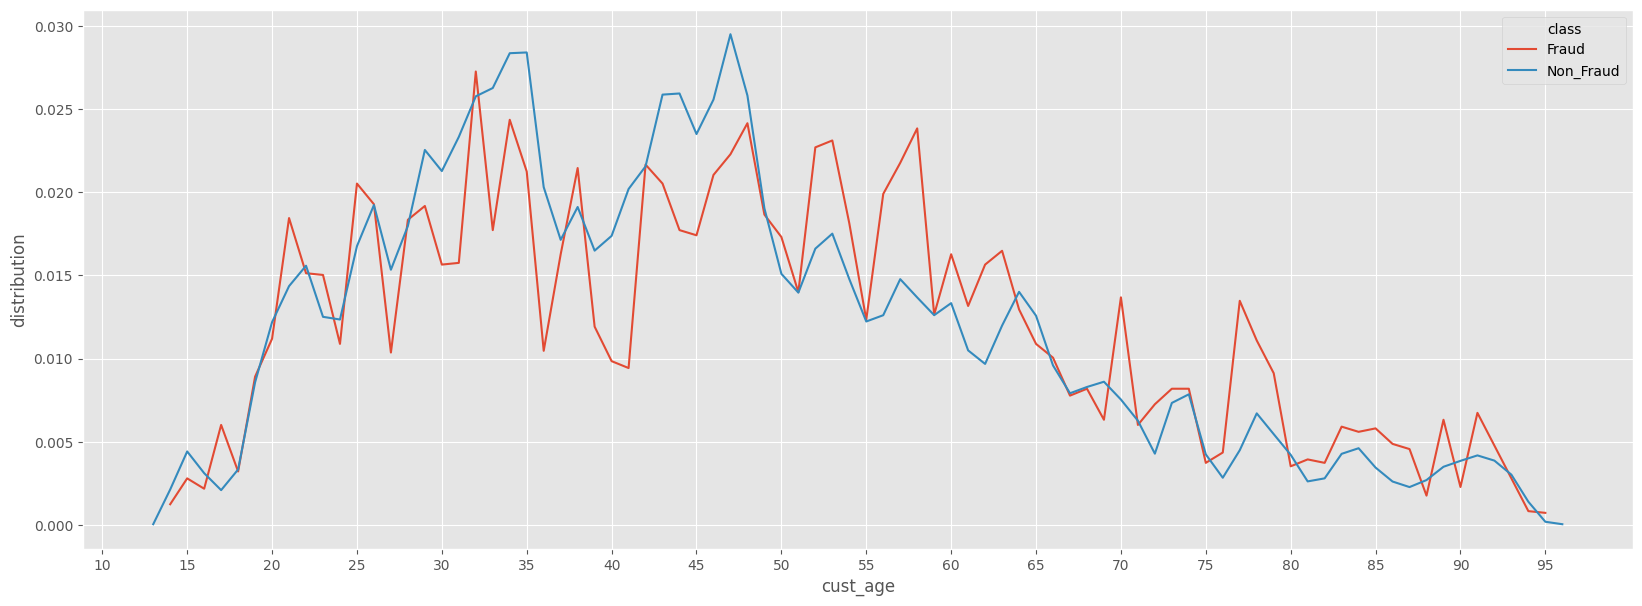

In [ ]:
plt.figure(figsize = [20,7])

trans_hour_distribution = all_trans.groupby('class')['cust_age'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'cust_age', y = 'distribution', hue = 'class')

plt.xticks(np.arange(10,100,5));

stats_by_class('cust_age')

**Conclusion :**

- The transctions are majorly from people whose age is in the range of 30 - 50.

- The Fraud transaction are majorly concentrated for those card holders whose are age ranges between 45 - 60

> **6.3.D ) Amount of Transactions**

class,Fraud,Non_Fraud
amin,1.06,1.00
amax,1376.04,28948.90
mean,530.66,67.65
median,390.00,47.24


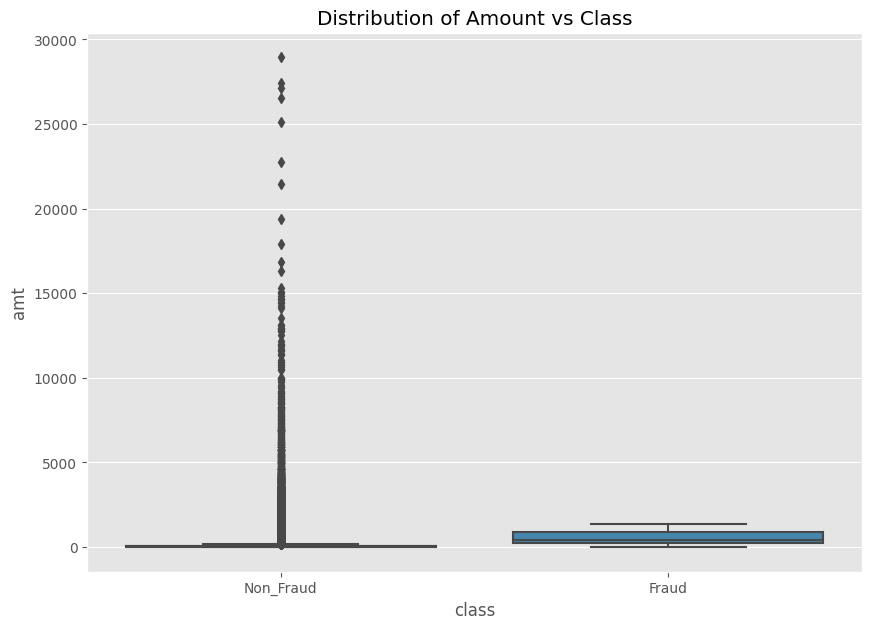

In [ ]:
plot_box(all_trans,'class','amt','Distribution of Amount vs Class');

stats_by_class('amt')

**Conclusion :**

- The mean value of the fraud transactins seems to be high ~ 530 where normal transctions is the 67
- from the boxplot it is very clear that the fraud transaction does not have outlier amount but the majority is heavily concentrated with median of 390 which is very high from the normal transactions

> **6.3.E ) Hour of Transactions**

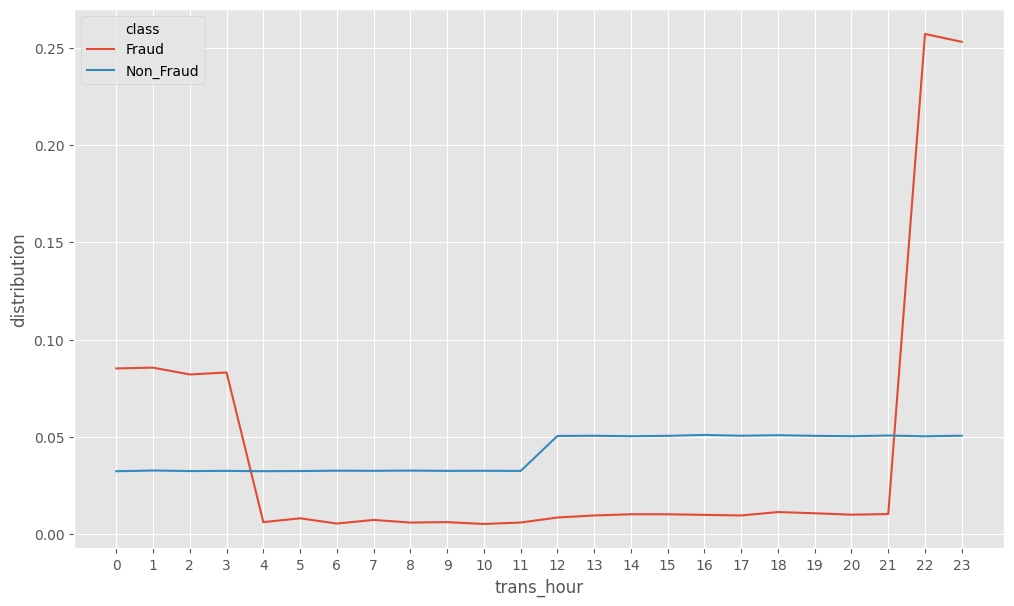

In [ ]:
plt.figure(figsize = [12,7])

trans_hour_distribution = all_trans.groupby('class')['trans_hour'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'trans_hour', y = 'distribution', hue = 'class')
plt.xticks(np.arange(0,24,1))

plt.show()

**Observation :**

- Normal Transactions are distributed similarly over the hours with slight increase from 11th hour and maintatinig the same till 23rd hour
- Fraud Transactions are majorly taking place between 21st hour - 04 hour
- In other words, fraud transactions are happening in mid-night when the geniune card holders are sleeping and unable to get notified on the transaction messages

> 5. **Delay Between each Transactions**

class,Fraud,Non_Fraud
amin,0.00,0.00
amax,14417.00,22357.00
mean,361.73,516.47
median,84.00,262.00


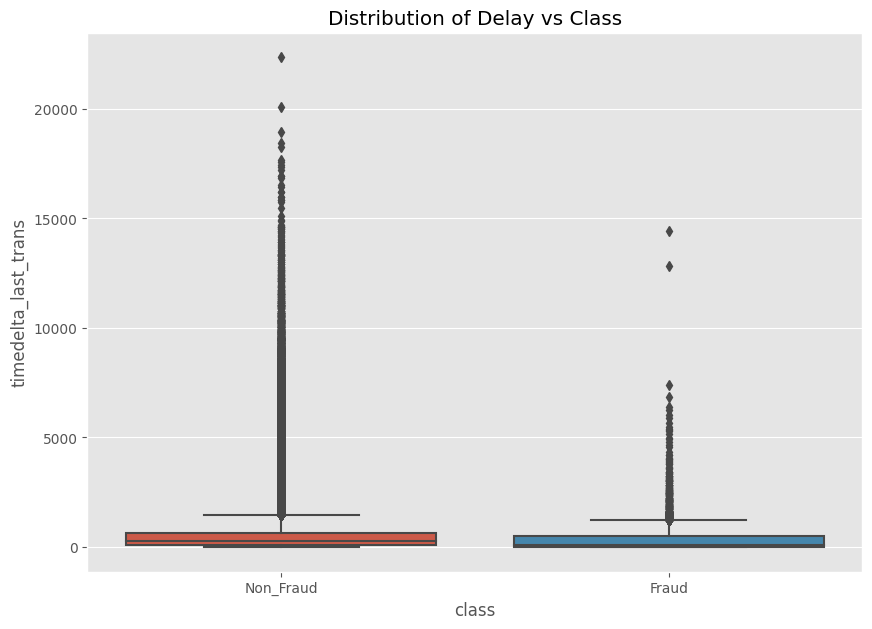

In [ ]:
plot_box(all_trans,'class','timedelta_last_trans','Distribution of Delay vs Class')
stats_by_class('timedelta_last_trans')

**Observation :**

- The Successive fraud transactions are quicky happening compared to the other transactions

> **6.3.F ) The Weekday of the Transaction**


Normalized frequency of < trans_dayofweek > on both classes and the percentage diffrence



,trans_dayofweek,normal,fraud,diff in %
0,Monday,19.966648,15.376645,-4.590003
1,Sunday,18.564010,16.474977,-2.089034
2,Tuesday,14.601819,13.117812,-1.484008
3,Saturday,14.203500,15.469899,1.266400
6,Wednesday,9.919343,11.656823,1.737480
5,Thursday,11.147729,13.646254,2.498525
4,Friday,11.596951,14.257590,2.660639


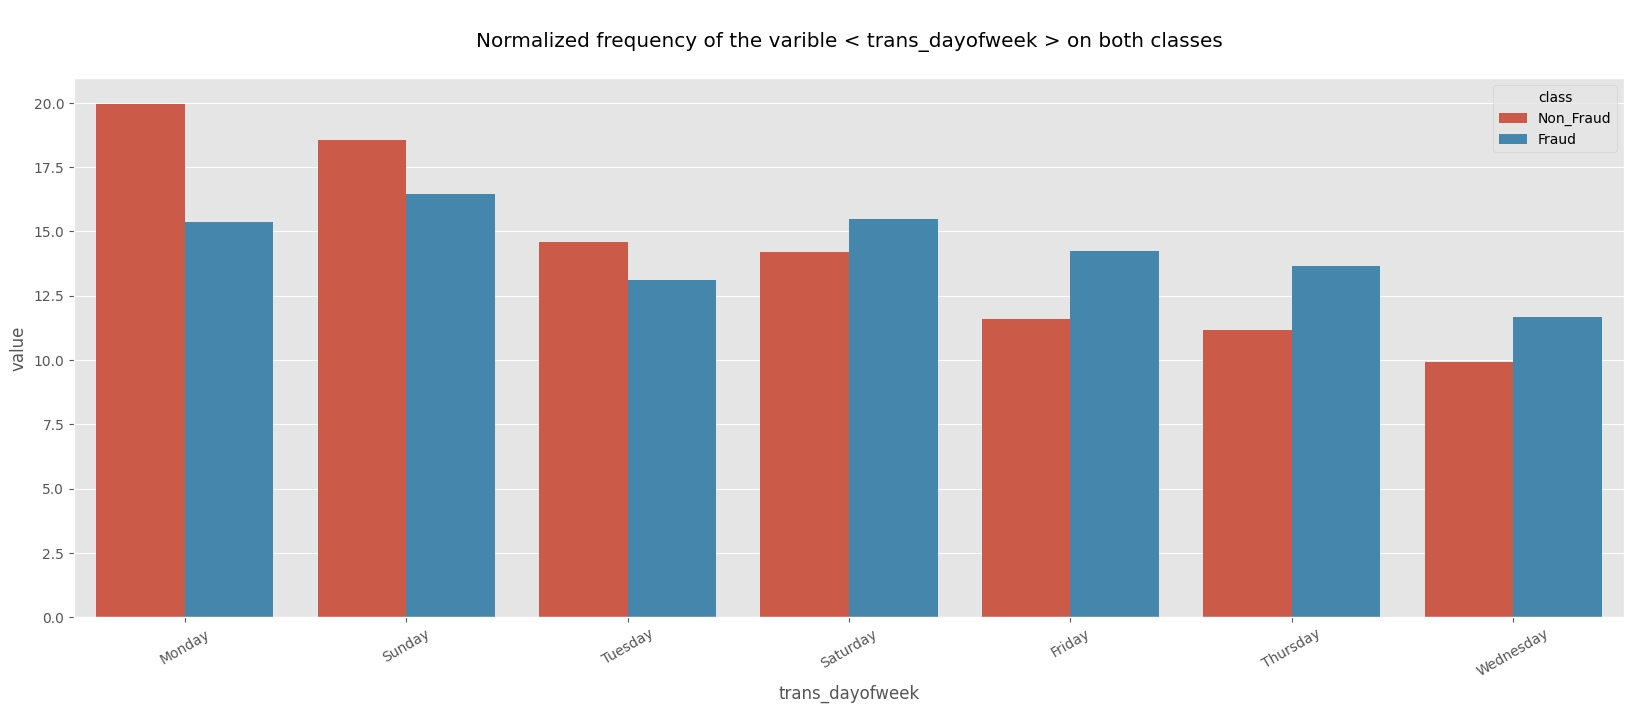

In [ ]:
normalize_count_by_class('trans_dayofweek')

**Observation :**

The normalized percentage of the fraud transactions seems to be slight higher in wednesday, thursday, friday and saturday

> **6.3.G ) Lat Distance between Customer & Merchant**

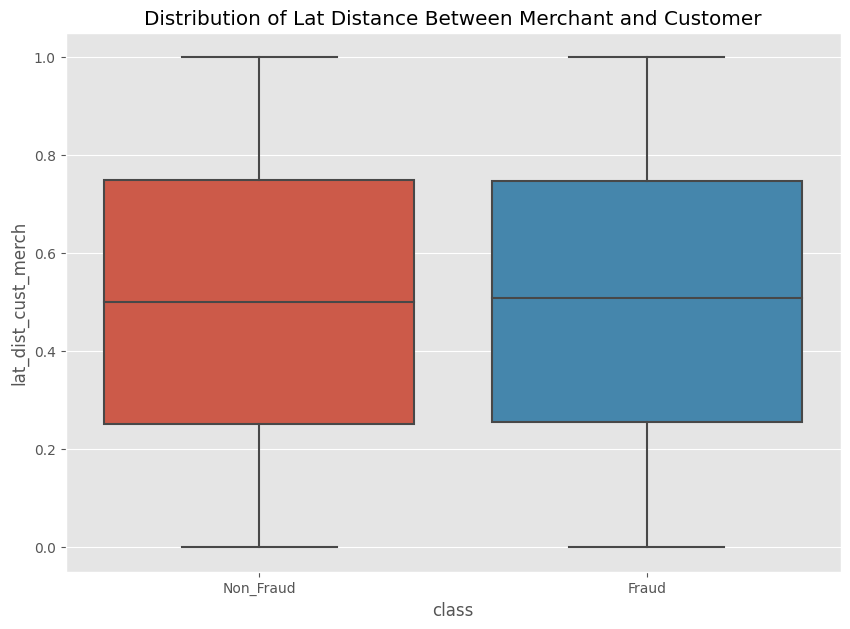

In [ ]:
plot_box(all_trans,'class','lat_dist_cust_merch','Distribution of Lat Distance Between Merchant and Customer')

**Observation :**

- There is no any observable difference in the overall distribution in the lat distance between the customer and the merchant



> **6.3.H ) Long Distance between Customer & Merchant**

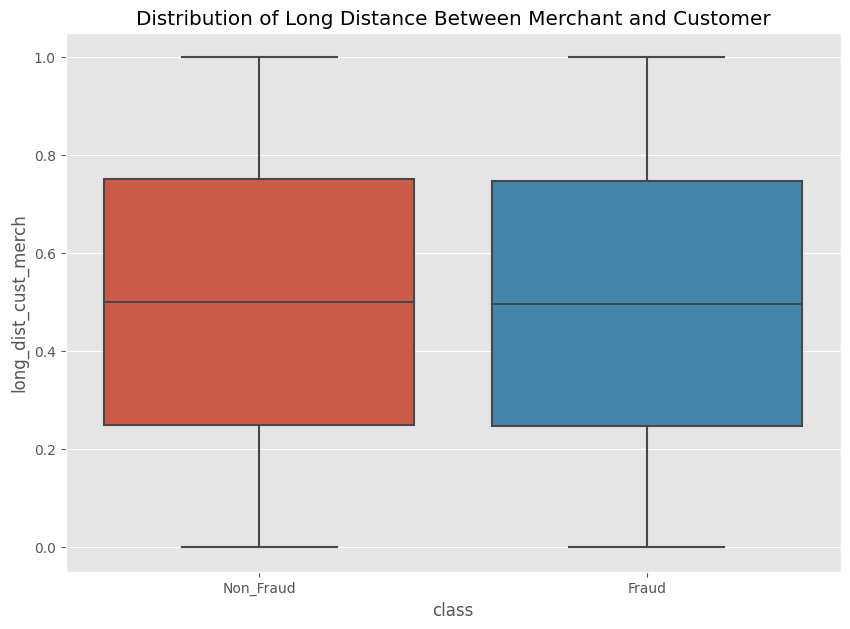

In [ ]:
plot_box(all_trans,'class','long_dist_cust_merch','Distribution of Long Distance Between Merchant and Customer');

**Observation :**

- There is no any observable difference in the overall distribution in the long distance between the customer and the merchan

> **6.3.I ) Lat Distance between Current Customer & Prev-Merchant**

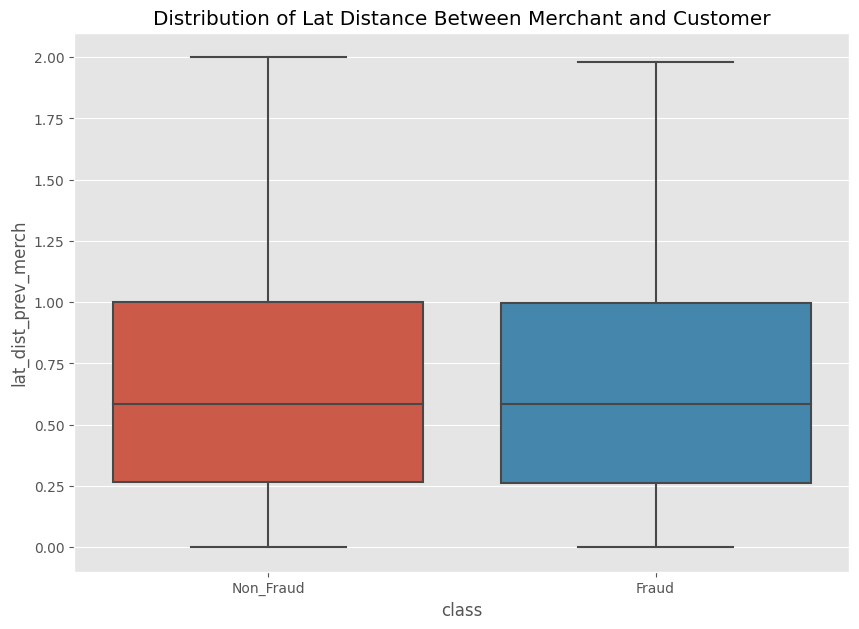

In [ ]:
plot_box(all_trans,'class','lat_dist_prev_merch','Distribution of Lat Distance Between Merchant and Customer');

**Observation :**

- There is no any observable difference in the overall distribution in the lat distance between the current and the previouse merchant

> **6.3.J ) Long Distance between Current Customer & Prev-Merchant**

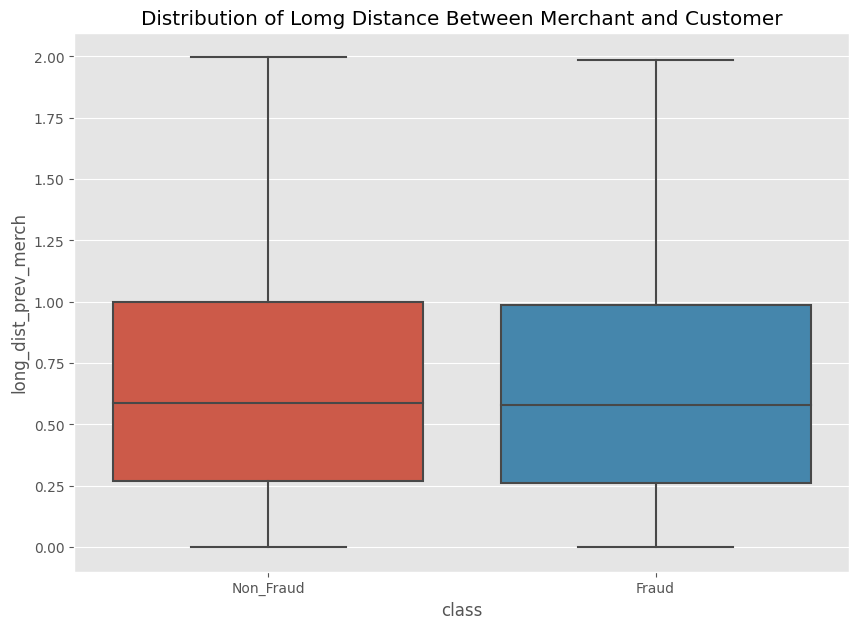

In [ ]:
plot_box(all_trans,'class','long_dist_prev_merch','Distribution of Lomg Distance Between Merchant and Customer');

**Observation :**

- There is no any observable difference in the overall distribution in the long distance between the current and the previouse merchant

> **6.3.K ) Category of Item/Service Purchased**


Normalized frequency of < category > on both classes and the percentage diffrence



,category,normal,fraud,diff in %
1,home,9.507294,2.745829,-6.761465
4,kids_pets,8.759930,3.149933,-5.609998
7,food_dining,7.083136,2.124132,-4.959004
9,health_fitness,6.640535,1.916900,-4.723636
6,entertainment,7.262326,3.025593,-4.236733
8,personal_care,7.043576,3.004870,-4.038706
10,misc_pos,6.181383,3.336442,-2.844941
0,gas_transport,10.161862,7.999171,-2.162691
12,grocery_net,3.511233,1.813284,-1.697949
13,travel,3.136628,1.616413,-1.520216


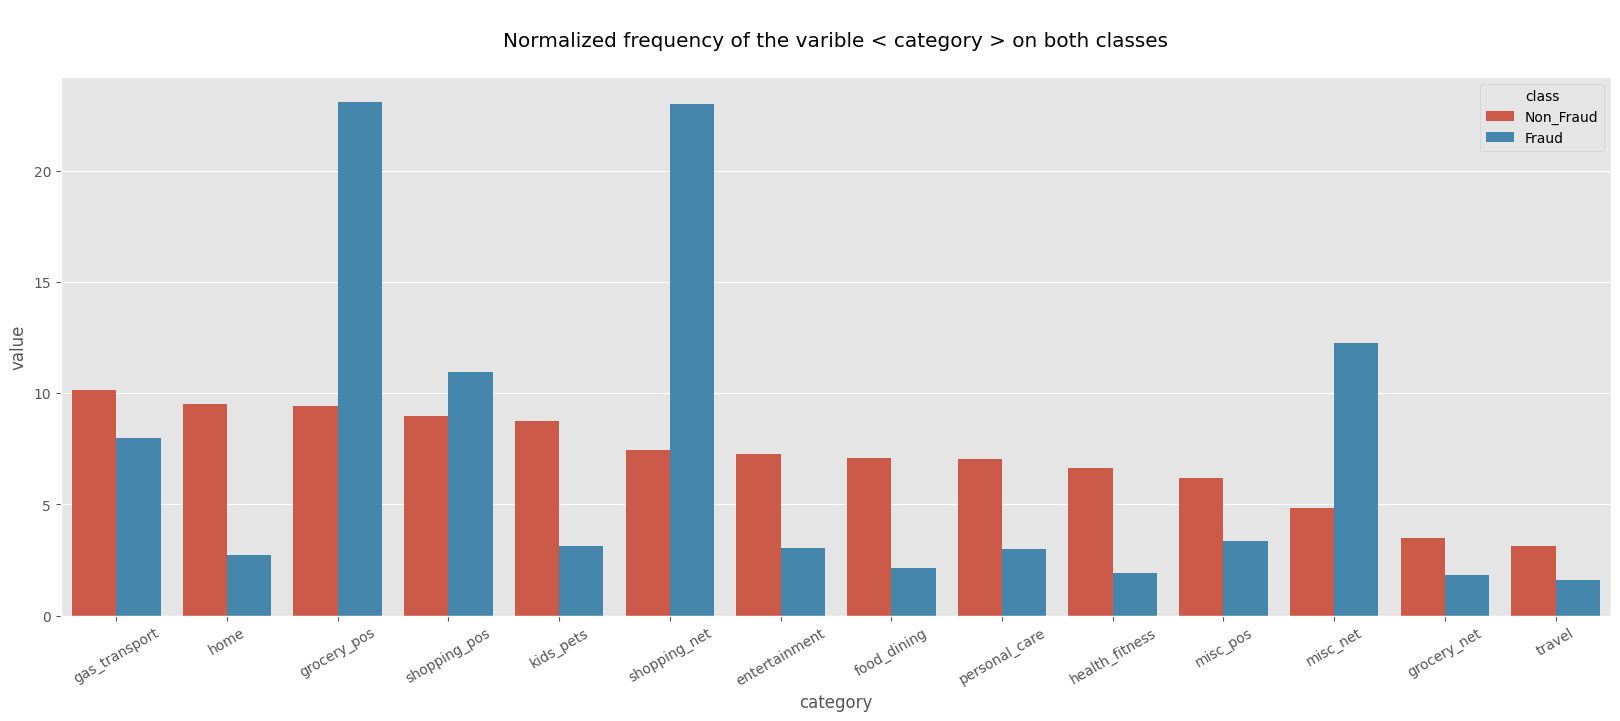

In [ ]:
normalize_count_by_class('category')

**Observation :**

- The normalized percentage of the grocery_pos, shopping_pos, shopping_net, misc_net are higher for frad transactions

> **6.3.L ) State**


Normalized frequency of < state > on both classes and the percentage diffrence



,state,normal,fraud,diff in %
0,tx,7.308507,6.134079,-1.174428
22,wv,1.974394,1.512797,-0.461597
5,mi,3.555895,3.098125,-0.457770
27,la,1.619325,1.170863,-0.448462
11,ar,2.410320,2.020516,-0.389804
12,nc,2.330168,2.020516,-0.309652
8,al,3.160669,2.880531,-0.280138
34,nd,1.144978,0.870376,-0.274602
28,wy,1.500860,1.233033,-0.267828
9,mo,2.965253,2.714745,-0.250509


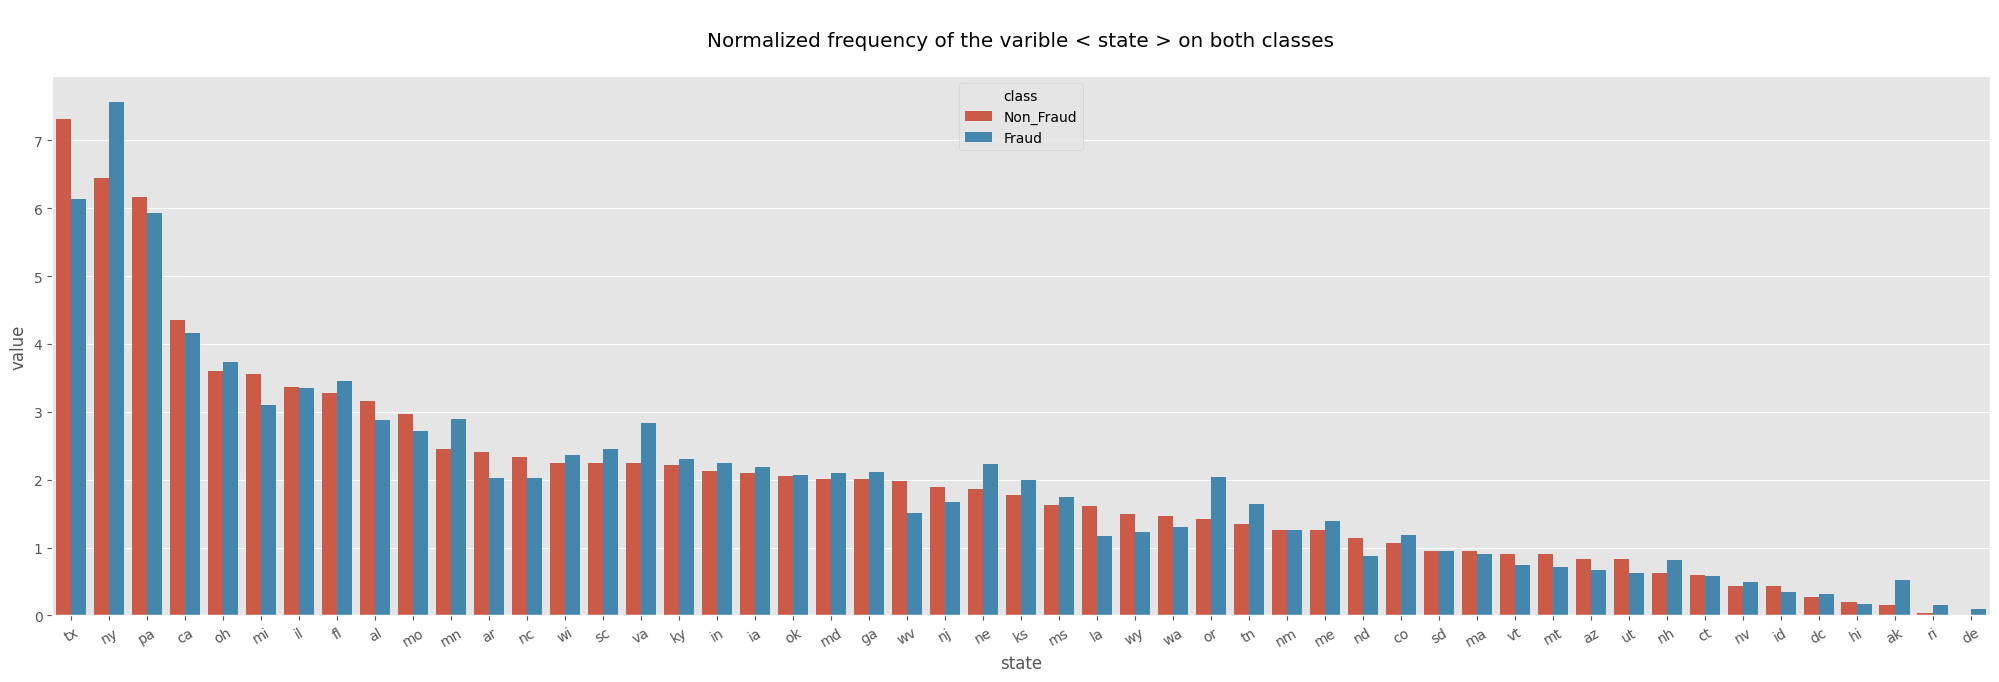

In [ ]:
normalize_count_by_class('state', width = 25)

> **6.3.L ) Correlation Matrix between the variables**

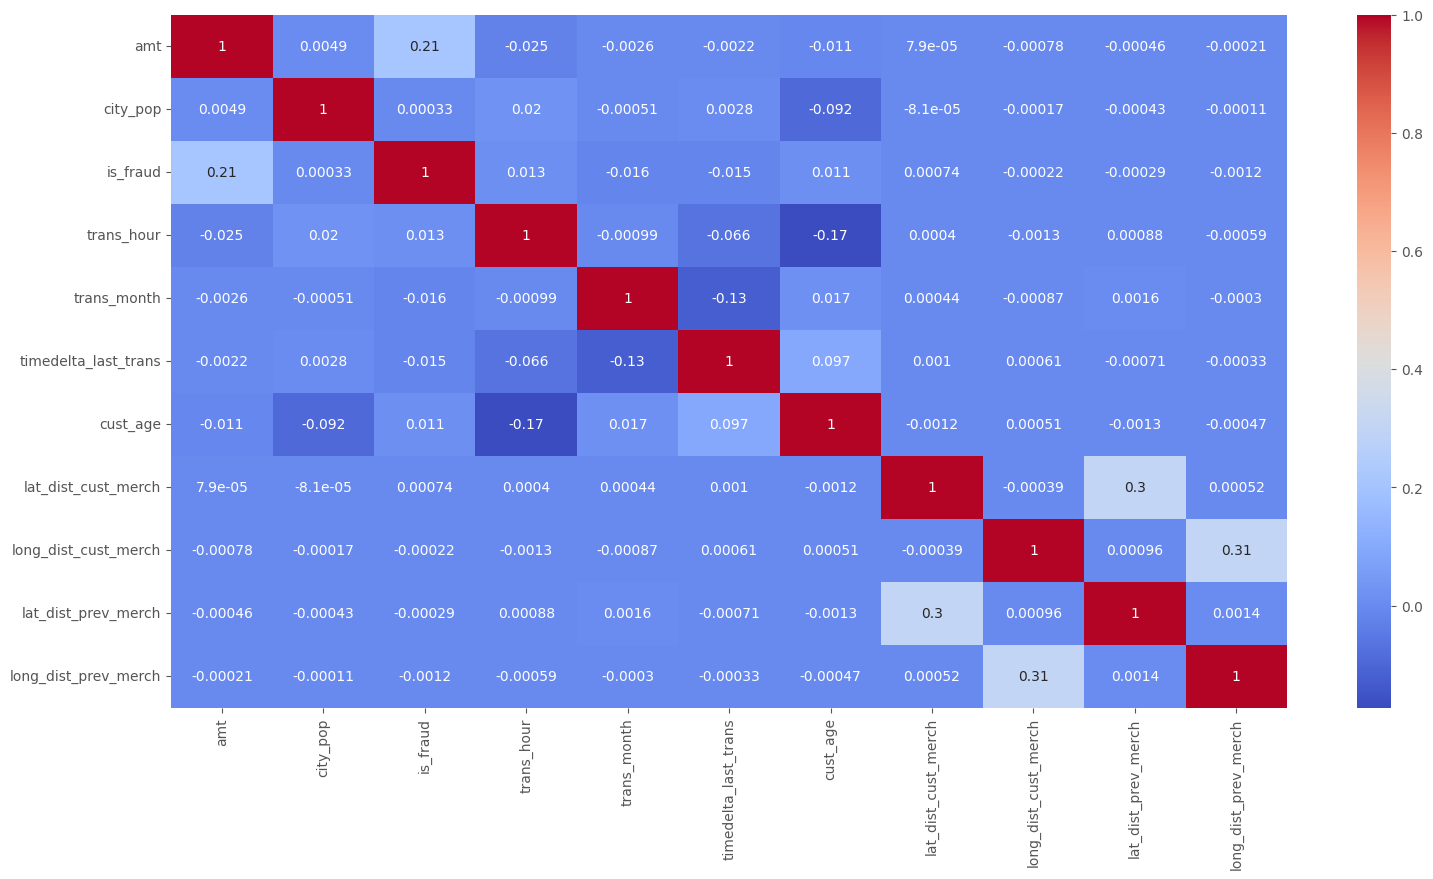

In [ ]:
fig = plt.figure(figsize=(18,9))
sns.heatmap(all_trans.corr(),cmap='coolwarm', annot=True)
plt.show()

In [ ]:
data

**Conclusion :**

There is not much visible correlations are seen.

In [ ]:

target_column = 'trans_hour'

lower_limit = 5
upper_limit = 20

filtered_df = data[(data[target_column] < lower_limit) | (data[target_column] > upper_limit)]

print(filtered_df)

               category     amt gender state  city_pop  is_fraud split_label  \
8         personal_care   26.74      f    wy      1645         0       train   
9           grocery_pos  105.20      f    wy      1645         0       train   
10        personal_care    4.98      f    wy      1645         0       train   
14            kids_pets  200.77      f    wy      1645         0       train   
15        entertainment   81.48      f    wy      1645         0       train   
...                 ...     ...    ...   ...       ...       ...         ...   
1852383   gas_transport   57.43      m    il       532         0        test   
1852386  health_fitness   96.03      m    il       532         0        test   
1852387   entertainment    1.81      m    il       532         0        test   
1852388  health_fitness   91.57      m    il       532         0        test   
1852389   gas_transport   66.11      m    il       532         0        test   

         trans_hour  trans_month trans_

In [ ]:
filtered_file_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/FRAUD/filtered_dataset.csv'

# Save the filtered DataFrame to the specified file path
filtered_df.to_csv(filtered_file_path, index=False)

NameError: ignored

In [ ]:
del all_trans,normal,fraud # delete dataframes created for ploting purpose for free up the memory

NameError: ignored

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/PROJECTS/Fraud_detection/FRAUD/filtered_dataset.csv')

### 7.Data Preprocessing

- 7.1 Splitting the train and test data sets
- 7.2 Create a symmetric train dataset based on the target variable
- 7.3 Outlier handing
- 7.4 Categorical Encoding
- 7.5 Variable Transformation
- 7.7 Feature Scalling.

> **7.1 Split the Train - Test Dataset**

- Since our original dataset were already split, `we will use not the scikit learn train_test split class` insated we will use the `split_label` column for spliting the dataset into train and test

In [ ]:
train_data = data[data['split_label'] == 'train']

test_data = data[data['split_label'] == 'test']

In [ ]:
train_data.drop('split_label', axis =1, inplace = True)

test_data.drop('split_label', axis =1, inplace = True)

In [ ]:
X_train = train_data.drop('is_fraud', axis = 1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis = 1)
y_test = test_data['is_fraud']

> **7.2 Create a Symmetric train Dataset For Preprocessing**


- First, let us resample the traing data into a symmetric train dataset using the `sklearn resample class`
- Learn the `parameters from` the bench mark values from the `symmetric dataset` (train- symmetric)
- Apply the `transformations` to the `real train and test datasets`

> **Why Skleran Resample at This stage**

- since the dataset having lot of non-numerical variable, another oversampling methods will not work out at this stage
- Generating a bootstrap sample of a dataset for use in statistical estimation or hypothesis testing
- We will use the `SMOTE` or `ADASYN` later during the model building stage, ie, once all variable are converved to numbers and all the preprocessing are done

In [ ]:
from sklearn.utils import resample

In [ ]:
train_majority = train_data[train_data['is_fraud'] == 0]

train_minority = train_data[train_data['is_fraud'] == 1]

majority_count = len(train_majority)

majority_count

405796

In [ ]:
minority_resampled = resample(train_minority,n_samples = majority_count) # resampling the minority class using the boostaping method makes it equavalent in count with the majority class

In [ ]:
train_symmetric = pd.concat([train_majority,minority_resampled], axis = 0) # concatinating the majority class subset and resampled minority class dataset to create a symmetric dataset

train_symmetric['is_fraud'].value_counts(normalize = True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [ ]:
train_symmetric_X = train_symmetric.drop('is_fraud', axis = 1)

train_symmetric_y = train_symmetric['is_fraud']

> **7.2 Outlier Handling**

>  - For the outlier handling, we choose to use the an open-source library `feature_engine`
>  - Identifying the varibles with outliers
>  - Handling the outliers

In [ ]:
# select the numerical columns

num_cols = X_train.select_dtypes(include = np.number).columns

num_cols

Index(['amt', 'city_pop', 'trans_hour', 'trans_month', 'timedelta_last_trans',
       'cust_age', 'lat_dist_cust_merch', 'long_dist_cust_merch',
       'lat_dist_prev_merch', 'long_dist_prev_merch'],
      dtype='object')

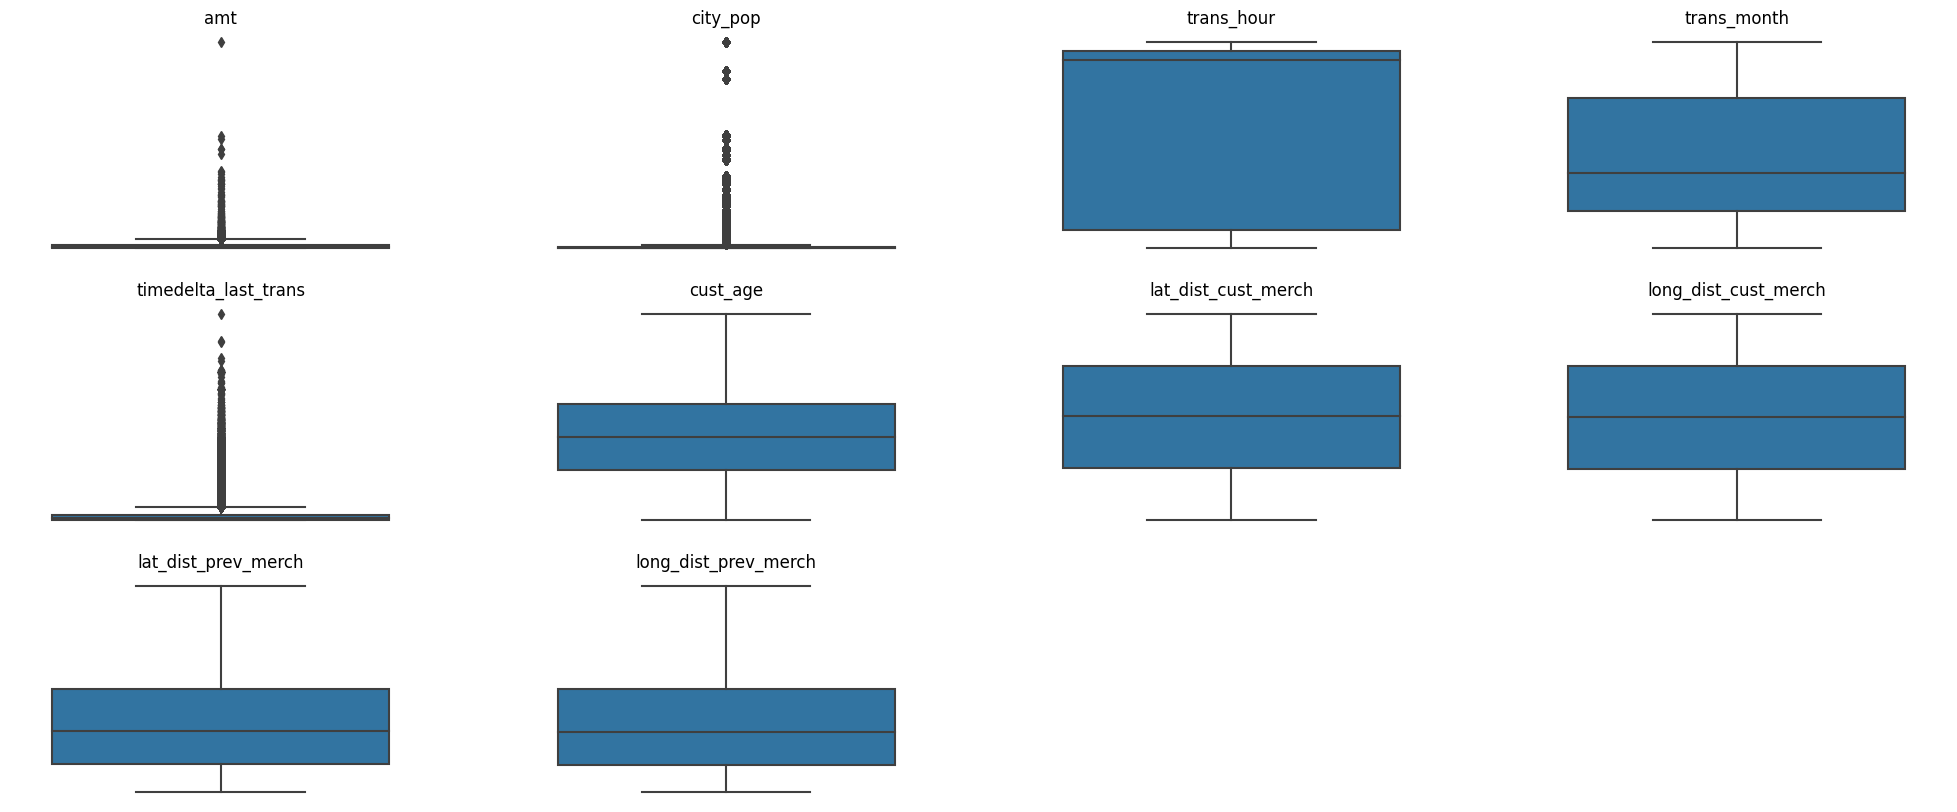

In [ ]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

**Conclusion :**

The the following variables has outliers in it.

  1. `amt`
  2. `city_pop`
  3. `timedelta_last_trans`

> Importing the Winsorizer Class from feature engine for outlier handling

In [ ]:
from feature_engine.outliers import Winsorizer

In [ ]:
variables = ['amt', 'city_pop', 'timedelta_last_trans']
capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables)

> Fitting the capper object in the symmetric train dataset, to learn the parameters

In [ ]:
capper_iqr.fit(train_symmetric_X)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['amt', 'city_pop', 'timedelta_last_trans'])

In [ ]:
print('upper capping value : ',capper_iqr.right_tail_caps_) # print the leraned parameters - upper cap

print('lower capping value : ',capper_iqr.left_tail_caps_) # pring the learned parameters - lower cap

upper capping value :  {'amt': 1120.7849999999999, 'city_pop': 51698.0, 'timedelta_last_trans': 1224.0}
lower capping value :  {'amt': -638.295, 'city_pop': -29830.0, 'timedelta_last_trans': -672.0}


> Transforming self (train_symmetric), Real X_train, and Real X_test with the leaned parameter by the capper obeject

In [ ]:
train_symmetric_X = capper_iqr.transform(train_symmetric_X)

X_train = capper_iqr.transform(X_train)

X_test = capper_iqr.transform(X_test)

> Lets Look at all the distribution of the variables one more time

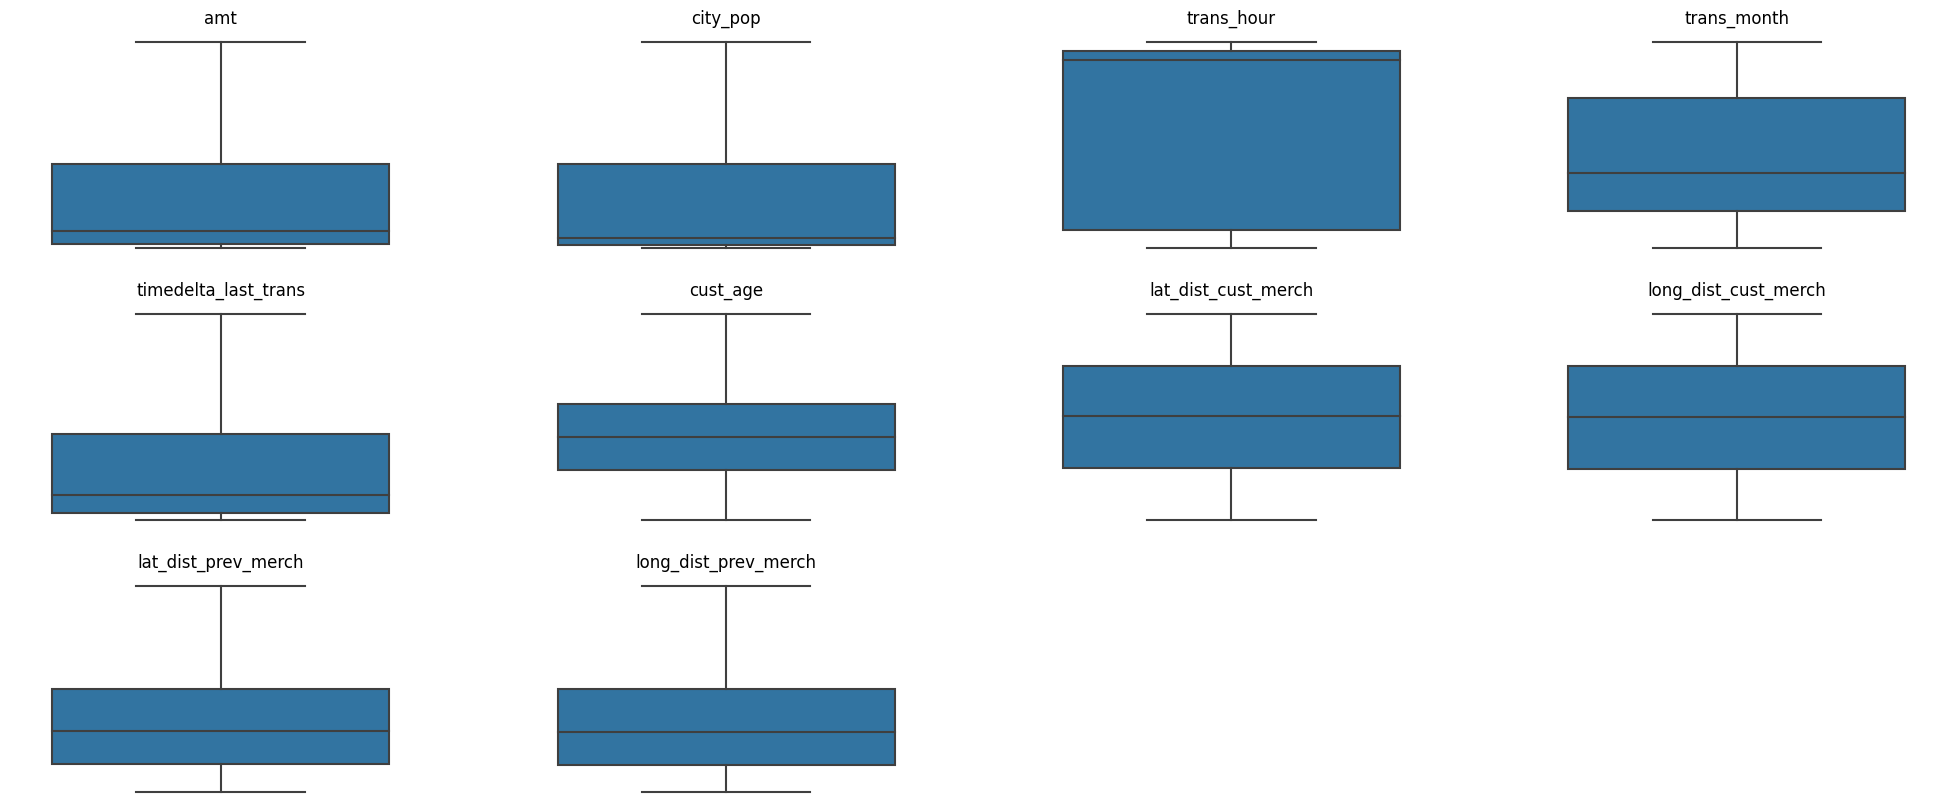

In [ ]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

> Almost all variables look good in terms their distribution

> **7.3 Categorical Encoding Encoding**

> **Objective :** To convert non-numeric categorical variables into numerical values to be used by model building phase, allowing them to use categorical data and improve performance, it prevent the curse of dimensionality

> Steps

 - Check the cardinality of the variables
 - Choose the encoding type
 - Execute the encoding

> **7.3.A ) Check the Cardinality of the Categorical variables**

In [ ]:
cat_cols = X_train.select_dtypes(exclude = np.number).columns

X_train[cat_cols].nunique().sort_values(ascending = False)

state              51
category           14
trans_dayofweek     7
gender              2
dtype: int64

> **7.3.B ) Choosing Encoding Types**

> 1.OneHotEncoding : `category` , `gender`

> 2.Target Guided Mean Encoding : `state`,`trans_dayofweek`

> **7.3.C ) Execute the Encoding - OneHotEncoding**

> import the OneHotEncoder Class from the feature engine

In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
variables = ['category','gender']

> Lets create the encoder instance

In [ ]:
onehot_encod = OneHotEncoder(variables = variables, drop_last = True)

> Lets fit on the symmetric train data

In [ ]:
onehot_encod.fit(train_symmetric_X)

OneHotEncoder(drop_last=True, variables=['category', 'gender'])

> Transfrom self, Real X_train and real X_test

In [ ]:
train_symmetric_X = onehot_encod.transform(train_symmetric_X) # transform the symmetric X

X_train = onehot_encod.transform(X_train) # transform the real X

X_test = onehot_encod.transform(X_test) # transform test X

> **7.3.D ) Execute the Encoding - Target Guided Mean Encoding**

> Importing the MeanEncoder Class from feature_engine

In [ ]:
from feature_engine.encoding import MeanEncoder

In [ ]:
variables = ['state','trans_dayofweek']

> Creating the mean encoder instance

In [ ]:
mean_encod = MeanEncoder(variables = variables)

> Fitting the object on the symmetric X train

In [ ]:
mean_encod.fit(train_symmetric_X,train_symmetric_y)

MeanEncoder(variables=['state', 'trans_dayofweek'])

> Let look at the encoding dict

In [ ]:
mean_encod.encoder_dict_

{'state': {'ak': 0.7447280799112098,
  'al': 0.4733988340331852,
  'ar': 0.46468151796708834,
  'az': 0.37885208012326654,
  'ca': 0.5050694075915426,
  'co': 0.5931679925128686,
  'ct': 0.2541856925418569,
  'dc': 0.5364420062695925,
  'de': 1.0,
  'fl': 0.5334594632471445,
  'ga': 0.4950878054770969,
  'hi': 0.35774865073245954,
  'ia': 0.49212979779634336,
  'id': 0.2605958875367184,
  'il': 0.5139367139077169,
  'in': 0.4562109302469518,
  'ks': 0.5368380903947619,
  'ky': 0.467419430722183,
  'la': 0.4164385980400812,
  'ma': 0.4934729223213132,
  'md': 0.5005737754424111,
  'me': 0.5342490031014622,
  'mi': 0.4660190588756741,
  'mn': 0.5328714763497372,
  'mo': 0.46545667447306793,
  'ms': 0.4922672193877551,
  'mt': 0.3011102603369066,
  'nc': 0.46863244080548794,
  'nd': 0.4098442367601246,
  'ne': 0.5739556099460421,
  'nh': 0.5508174616551492,
  'nj': 0.45908932916232187,
  'nm': 0.4809324199979552,
  'nv': 0.6038543897216274,
  'ny': 0.5268469562732209,
  'oh': 0.5491405770

> Transforming the X_symmetric, Real_X and X_test

In [ ]:
train_symmetric_X = mean_encod.transform(train_symmetric_X)

X_train = mean_encod.transform(X_train)

X_test = mean_encod.transform(X_test)

>>All the variables are now converted into numbers

In [ ]:
X_train.dtypes

amt                        float64
state                      float64
city_pop                     int64
trans_hour                   int64
trans_month                  int64
trans_dayofweek            float64
timedelta_last_trans       float64
cust_age                   float64
lat_dist_cust_merch        float64
long_dist_cust_merch       float64
lat_dist_prev_merch        float64
long_dist_prev_merch       float64
category_personal_care       int64
category_grocery_pos         int64
category_kids_pets           int64
category_entertainment       int64
category_shopping_net        int64
category_food_dining         int64
category_misc_net            int64
category_health_fitness      int64
category_shopping_pos        int64
category_gas_transport       int64
category_misc_pos            int64
category_grocery_net         int64
category_home                int64
gender_f                     int64
dtype: object

> **7.4 Transforming the Highly Skewed Variables**

- look at the skewness of the variables
- list the variables having skewness more than 2.0 or lesser than -2.0
- lets look at the varibale minimum value to decide the which transformation can be choosen.
- Fit and tranform the transformer

> 7.4.A ) Look at the skewness of the variables

In [ ]:
X_train.skew()

amt                        5.269850
state                     -1.134256
city_pop                   1.227828
trans_hour                 0.042572
trans_month                0.299523
trans_dayofweek           -0.085380
timedelta_last_trans       1.007281
cust_age                   0.556756
lat_dist_cust_merch       -0.003383
long_dist_cust_merch      -0.001968
lat_dist_prev_merch        0.565400
long_dist_prev_merch       0.565291
category_personal_care     3.896130
category_grocery_pos       2.253413
category_kids_pets         3.402750
category_entertainment     3.570567
category_shopping_net      3.145471
category_food_dining       3.700661
category_misc_net          3.698947
category_health_fitness    4.035610
category_shopping_pos      2.871806
category_gas_transport     2.158780
category_misc_pos          3.470600
category_grocery_net       4.309798
category_home              3.234858
gender_f                  -0.167452
dtype: float64

> 7.4.B ) list the variables having skewness more than 2.0 or lesser than -2.0

In [ ]:
skew = X_train.skew()
feature_high_skew = list(skew[(skew > 2) | (skew < -2)].index)
feature_high_skew

['amt',
 'category_personal_care',
 'category_grocery_pos',
 'category_kids_pets',
 'category_entertainment',
 'category_shopping_net',
 'category_food_dining',
 'category_misc_net',
 'category_health_fitness',
 'category_shopping_pos',
 'category_gas_transport',
 'category_misc_pos',
 'category_grocery_net',
 'category_home']

In [ ]:
X_train.min()

amt                         1.000000
state                       0.254186
city_pop                   23.000000
trans_hour                  0.000000
trans_month                 1.000000
trans_dayofweek             0.447413
timedelta_last_trans        0.000000
cust_age                   13.000000
lat_dist_cust_merch         0.000000
long_dist_cust_merch        0.000003
lat_dist_prev_merch         0.000000
long_dist_prev_merch        0.000000
category_personal_care      0.000000
category_grocery_pos        0.000000
category_kids_pets          0.000000
category_entertainment      0.000000
category_shopping_net       0.000000
category_food_dining        0.000000
category_misc_net           0.000000
category_health_fitness     0.000000
category_shopping_pos       0.000000
category_gas_transport      0.000000
category_misc_pos           0.000000
category_grocery_net        0.000000
category_home               0.000000
gender_f                    0.000000
dtype: float64

Note : Since we have zero or negative values in the dataset, We can try the following,

- Exponential Transformation
- Yoejohnson Transformation

> Import the YeoJohnsonTransformer from feature Engine

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

> Creating the transformer object

In [ ]:
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)

> Fitting the symmetric X train

In [ ]:
yeojohnson_transformer.fit(train_symmetric_X)

YeoJohnsonTransformer(variables=['amt', 'category_personal_care',
                                 'category_grocery_pos', 'category_kids_pets',
                                 'category_entertainment',
                                 'category_shopping_net',
                                 'category_food_dining', 'category_misc_net',
                                 'category_health_fitness',
                                 'category_shopping_pos',
                                 'category_gas_transport', 'category_misc_pos',
                                 'category_grocery_net', 'category_home'])

> Transform the dataset to the transformation object

In [ ]:
train_symmetric_X = yeojohnson_transformer.transform(train_symmetric_X)

X_train = yeojohnson_transformer.transform(X_train)

X_test = yeojohnson_transformer.transform(X_test)

> **7.5 Feature Scalling**

- Lets use the min-max scaler (normalization) since the dataset is not in the risk of the outliers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_symmetric_X)

MinMaxScaler()

> Lets look at the min-max parameters for each variables

In [ ]:
scaler.data_max_

array([9.48407866e+00, 1.00000000e+00, 5.16980000e+04, 2.30000000e+01,
       1.20000000e+01, 5.51659720e-01, 1.22400000e+03, 9.50000000e+01,
       9.99998000e-01, 9.99997000e-01, 1.99811600e+00, 1.99622300e+00,
       2.92788392e-02, 1.27667455e-01, 3.48464500e-02, 3.29171301e-02,
       1.05645789e-01, 2.79507775e-02, 6.33387296e-02, 2.38965615e-02,
       6.87187977e-02, 7.60493245e-02, 3.42298183e-02, 2.24378299e-02,
       3.57790817e-02, 1.00000000e+00])

In [ ]:
scaler.data_min_

array([ 7.13143948e-01,  2.54185693e-01,  2.30000000e+01,  0.00000000e+00,
        1.00000000e+00,  4.47412539e-01,  0.00000000e+00,  1.30000000e+01,
        0.00000000e+00,  2.99999999e-06,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00])

> Lets transfor the dataframes to the minmax scaler

In [ ]:
train_symmetric_X = pd.DataFrame(data = scaler.transform(train_symmetric_X), columns = train_symmetric_X.columns)

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

> Lets look at the Train dataframe and after the transformation

In [ ]:
print('number of arrived columns : ', len(X_train.columns))

X_train.agg(func =[np.min,np.max,np.mean, np.std], axis = 0).transpose().round(2)

number of arrived columns :  26


,amin,amax,mean,std
amt,0.0,1.0,0.41,0.20
state,0.0,1.0,0.32,0.07
city_pop,0.0,1.0,0.27,0.38
trans_hour,0.0,1.0,0.51,0.44
trans_month,0.0,1.0,0.47,0.31
trans_dayofweek,0.0,1.0,0.48,0.38
timedelta_last_trans,0.0,1.0,0.34,0.32
cust_age,0.0,1.0,0.41,0.21
lat_dist_cust_merch,0.0,1.0,0.50,0.29
long_dist_cust_merch,0.0,1.0,0.50,0.29


10 fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=10, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

KeyboardInterrupt: 

### 8.Resampling for Modeling

**Context :**
After data preprocessing, we've got a better set of data to be trained on, in terms of data type and value consistency. Howeover, the dataset still is huge for modeling in term of experimenting and tuning different models And the target label is still highly imbalanced.
- Minority class need to have enough representation so that the model is not biased, hence the minority class need to be over sampled
- Majority class must be repeatative in the terms of a common pottern across the dataset, hence that can be under sampled

**Steps :**

- Create training samples through hybrid resampling methods
- Create two difftent trainig samples one For Training the models and the other one for a much smaller version for hyperparameter tuning
- Use `imblearn - make_pipeline class` for resampling pipeline
- Majority and Minority class must be equally contributing to both sub-samples
- The best of the model shall be re-trained on the balance sample on its entirety

> Lets check the original train set status

In [ ]:
print(X_train.shape, y_train.shape,'\n')
print(y_train.value_counts(normalize = True)*100)

(412278, 26) (412278,) 

0    98.42776
1     1.57224
Name: is_fraud, dtype: float64


In [ ]:
X_train_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/X_train.csv'

# Save the filtered DataFrame to the specified file path
X_train.to_csv(X_train_path, index=False)

NameError: ignored

In [ ]:
y_train_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/y_train.csv'

# Save the filtered DataFrame to the specified file path
y_train.to_csv(y_train_path, index=False)

In [ ]:
y_train.head()


,is_fraud
0,0
1,0
2,0
3,0
4,0


> Import SMOTE, RandomUnderSampler & make_pipeline Classes from the imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

> Create a control legth for each Class

*total legth of the resulting sample = control_length x 2*

In [ ]:
ini_records = sum(y_train['is_fraud'] == 0) # get to the number record representing the majority class

control_len = ini_records//3 # arriving the control length

control_len # display the control lengh ( expected numeber of each class in the resulting dataset )

135265

> Make pipeline for making the sample for Training

In [ ]:
resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

> Create the training sample using the above defined pipeline

In [ ]:
X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)

[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.7s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.3s


In [ ]:
y_train=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\y_train.csv')
X_train=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\X_train.csv')

In [ ]:
y_resampled=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\y_resampled.csv')
X_resampled=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\X_resampled.csv')

> Lets confirm the class distribution

In [ ]:
print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

(270530, 26) (270530, 1) 

is_fraud
0           50.0
1           50.0
Name: proportion, dtype: float64


> Lets create sample for hyperparameter tuning purpose

In [ ]:
control_len = 100000 # limiting the length of each class into much reduced size

resample_pipeline_hp_tuning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # over sampling the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

X_hp_tuning, y_hp_tuning = resample_pipeline_hp_tuning.fit_resample(X_train,y_train) # resampling with the pipeline

[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.6s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.3s


In [ ]:
y_hp_tuning.head()
y_hp_tuning_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/y_hp_tuning.csv'

# Save the filtered DataFrame to the specified file path
y_hp_tuning.to_csv(y_hp_tuning_path, index=False)

In [ ]:
X_hp_tuning.head()
X_hp_tuning_path = '/content/drive/MyDrive/PROJECTS/Fraud_detection/X_hp_tuning.csv'

# Save the filtered DataFrame to the specified file path
X_hp_tuning.to_csv(X_hp_tuning_path, index=False)
X_hp_tuning.head()

,amt,state,city_pop,trans_hour,trans_month,trans_dayofweek,timedelta_last_trans,cust_age,lat_dist_cust_merch,long_dist_cust_merch,...,category_shopping_net,category_food_dining,category_misc_net,category_health_fitness,category_shopping_pos,category_gas_transport,category_misc_pos,category_grocery_net,category_home,gender_f
0,0.526143,0.285907,0.008592,0.956522,1.000000,0.488254,0.044935,0.268293,0.380026,0.421604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.507319,0.323005,0.013895,0.956522,0.636364,0.775888,0.306373,0.243902,0.062983,0.541703,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.460827,0.305427,0.020416,0.043478,0.454545,0.775888,0.007353,0.646341,0.708626,0.920284,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.651093,0.303838,1.000000,0.956522,0.727273,0.775888,1.000000,0.256098,0.343527,0.989450,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.491314,0.313728,0.002245,0.130435,0.363636,0.488254,0.071895,0.634146,0.682324,0.853496,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


> Lets confirm the distribution of the class in the hyperparamter tuning class

In [ ]:
X_test=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\X_test.csv')
y_test=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\y_test.csv')

In [ ]:
y_hp_tuning=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\y_hp_tuning.csv')
X_hp_tuning=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\X_hp_tuning.csv')

In [ ]:
print(X_hp_tuning.shape, y_hp_tuning.shape,'\n')
print(y_hp_tuning.value_counts(normalize = True)*100)

(200000, 26) (200000, 1) 

is_fraud
0           50.0
1           50.0
Name: proportion, dtype: float64


### Delete the Redundant Objects to Freeup the Memory

In [ ]:
variable_remove = ['train_data','test_data','drop_cols2','stats_by_class','stats_by_var','normalize_count_by_class','trans_hour_distribution','majority_count','resample',
                   'train_majority','train_minority','minority_resampled','train_symmetric','train_symmetric_X','train_symmetric_y','num_cols','col_name','Winsorizer',
                   'OneHotEncoder','MeanEncoder','skew','feature_high_skew','YeoJohnsonTransformer','MinMaxScaler','SMOTE','RandomUnderSampler','make_pipeline','ini_records']

In [ ]:
# deleting the redundant variables from the memory

for rem in variable_remove:
  try:
    del vars()[rem]
  except:
    pass

### 9.Building Machine Learning Models

- 9.1 Assumptions
- 9.2 Selction of Algorithms
- 9.3 Selection of Evaluation Matric
- 9.4 Define functions for supporting model building and evaluation
- 9.5 Model Building
- 9.6 Buid Hybrid Model from best performing models to have balance with other metric
- 9.7 Finalising the best Model

> **9.1 Assumption**
- Dataset does not looks like linearly separable,hence the linear model like logistic regression may not perform well in the give dataset.
- Tree Models and ensembles could be the go to model in the given context


> **9.2 Go to Algorithms**.

  > - `Decision Tree`
  > - `Random Forest`
  > - `XG Boost`

> Note : Algorithms can be trained on the training samples with normal hyperparamters and Search Algorithms can be used to find the better hyperpatamers by training them on the tuning samples created above

> **9.2.A ) Search Algorithms**

- Easily implementable algorthms are GridseacchCV,RandomSearchCV,HalvingRandomSearchCV, BayesianSearchCV fron hyperopt.

- Considering the number models and the size of the datset, we choose the following

  -- `HalvingRandomSearchCV` - Much faster than GridSearchCV & RandomizedSearchCV - Get to hyperparametr through successive halving

  -- `BayesianSearchCV` - Gaussion Process Search - picking the parameters from its distributions (suitable XG boost where we have hyperparameters of continues nature)

> Reference Link : https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_heatmap.html#sphx-glr-auto-examples-model-selection-plot-successive-halving-heatmap-py

> **9.3 Best Evaluation Metric**

> - `Emphasizing true-positive` - for predicting the frauds effectively
> - `Emphasizing true-negatives` - for the seeamless user experice of the bank
> - Hense, we can choose the `roc_auc` as the best metric in our business context,
> - same time we may look at the precision and recall to finalize the best model

> **9.4 Defining Function to Train Model & Evaluate**

  > - Function to print confusion Matrix - which is more informtive and Readable
  > - Function to return the train and test performance of a model

> Function to print pretty confusion matrix

In [ ]:
import itertools

from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=12):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

> Function to print the best performance of a model (A
t differnt threshold values ranging from 0.1 to 0.9)

In [ ]:
y_test=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\y_test.csv')
X_test=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\X_test.csv')

In [ ]:
# Create a function for evaluating the model performance

from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

def evaluate_model(model,model_id,model_spec,X_train,y_train,y_true = y_test, X_test = X_test):

  eval_table = pd.DataFrame()

  for thresh in np.arange(0.1,1,0.1):

    y_pred_train = (model.predict_proba(X_train)[:,1] > thresh).astype(int)
    y_pred_test = (model.predict_proba(X_test)[:,1] > thresh).astype(int)

    roc_auc_train = round(roc_auc_score(y_train,y_pred_train)*100,2)
    precision_train = round(precision_score(y_train,y_pred_train)*100,2)
    recall_train = round(recall_score(y_train,y_pred_train)*100,2)
    f1_train = round(f1_score(y_train,y_pred_train)*100,2)
    mcc_train =round(matthews_corrcoef(y_train,y_pred_train)*100,2)

    roc_auc_test = round(roc_auc_score(y_true,y_pred_test)*100,2)
    precision_test = round(precision_score(y_true,y_pred_test)*100,2)
    recall_test = round(recall_score(y_true,y_pred_test)*100,2)
    f1_test = round(f1_score(y_true,y_pred_test)*100,2)
    mcc_test =round(matthews_corrcoef(y_true,y_pred_test)*100,2)

    eval_dict = {'model_id':[model_id,model_id],'validation on':['Train','Test'],'threshold' : [thresh,thresh],'roc_auc' : [roc_auc_train,roc_auc_test],'mcc': [mcc_train,mcc_test],
                'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                'f1_score':[f1_train,f1_test],'desc':[model_spec,model_spec]}

    eval_table_iter = pd.DataFrame(eval_dict)

    eval_table = pd.concat([eval_table, eval_table_iter], axis = 0)

  eval_table['sort_weight'] = eval_table[['roc_auc','precision','recall', 'mcc']].sum( axis = 1)
  eval_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
  eval_table.reset_index(inplace = True, drop = True)

  test = eval_table[eval_table['validation on'] == 'Test']
  test.reset_index(inplace = True, drop = True)

  best_threshold = test.iloc[0]['threshold']

  best_eval = eval_table[eval_table['threshold'] == best_threshold]

  best_eval.sort_values(by = 'validation on', ascending = False, inplace = True)

  y_pred_test_best_threshold = (model.predict_proba(X_test)[:,1] > best_threshold).astype(int)

  make_confusion_matrix(y_true = y_true,y_pred = y_pred_test_best_threshold, classes = ['Genuine','Fraud'])

  result = {'all':eval_table, 'best':best_eval,'all_test': test}

  return result # return a dictionary, by using the key : 'all','best','all_test', we may access the relevent content

> **9.5 Model Building**

> Importing the relevant Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

> **Model 1 : Decision Tree**

- *Normal Hyperparameters*

In [ ]:
model_1 =

,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
14,model_1,Train,0.6,98.61,97.25,100.00,97.22,98.59,Decision Tree | Normal H-Params,393.08
0,model_1,Test,0.6,91.44,69.64,58.68,83.50,68.93,Decision Tree | Normal H-Params,303.26


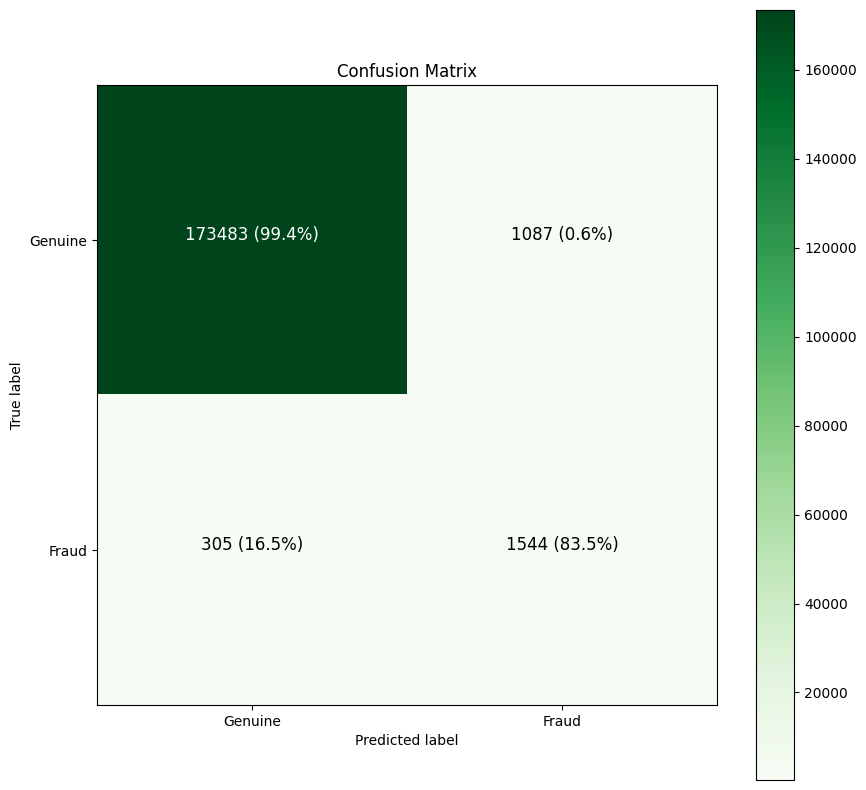

In [ ]:
model_1 = DecisionTreeClassifier(max_depth = 30, min_samples_split= 30, random_state=42,class_weight = {0:20,1:1}) # creating the model object

model_1_spec = 'Decision Tree | Normal H-Params'

model_1.fit(X_resampled,y_resampled) # fitting the model with train_sample

model_1_eval = evaluate_model(model_1,'model_1',model_1_spec,X_resampled, y_resampled) # calling the evaluate model function

model_1_eval['best'] # printing the best results

In [ ]:
import pickle

with open('model_1.pkl', 'wb' ) as file:
    pickle.dump(model_1,file)

In [ ]:
import pickle

with open('model_1.pkl', 'wb' ) as file:
    pickle.dump(model_1_eval,file)

**Inference :** Model is overfitting. And the precison is very less

> **Model 2 : Decision Tree | HyperParameter Tuning**

- *Optimized Hyperparameters*

Choosing the best model of Decision Tree for Hyperparameter Optimization (based on the performance on the test dataset)

Model trained on the SMOTE Sample is performing better and can be modified for by optimizing the hyperparameters thoough cross validation with help of Randomised Search CV

> Importing the labraries and classes for Cross Validation Search

- Cross Validation - `StratifiedKFoldCrossValidation` Scheme
- Search Algorith - `HalvingRandomSearchCV`

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

> Defining the Search Space and cross validation scheme

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # creating the stratified K fold cross validation

model_2_spec = 'Decision Tree | Optimized H-Params'

model_2 = DecisionTreeClassifier(random_state = 42, class_weight = {0:20,1:1}) # creating the model object

# defining the hyperparameter space

param_grid = {'max_depth': [10,20,30],
              'min_samples_split': [10,20,30,50],
              'min_samples_leaf': [5,10,20,50,100],
              }

> Training the hyper parameter space with hyperparameter-tuning dataset - In Halving Randomised Search

In [ ]:
%%time

# definnig the halving random search object

halving_search_dt = HalvingRandomSearchCV(estimator = model_2,
                                      param_distributions = param_grid,
                                      cv = skf,
                                      scoring = 'roc_auc',
                                      refit = True,
                                      n_jobs = -1,
                                      random_state = 42)

halving_search_dt.fit(X_hp_tuning,y_hp_tuning) # fitting

CPU times: total: 3.53 s
Wall time: 9.09 s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                      estimator=DecisionTreeClassifier(class_weight={0: 20,
                                                                     1: 1},
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [10, 20, 30],
                                           'min_samples_leaf': [5, 10, 20, 50,
                                                                100],
                                           'min_samples_split': [10, 20, 30,
                                                                 50]},
                      random_state=42, scoring='roc_auc')

> Accessing the best parameters

In [ ]:
best_params = halving_search_dt.best_params_
best_params

{'min_samples_split': 30, 'min_samples_leaf': 5, 'max_depth': 20}

> Lets Build model with training sample - by resetting into the best hyperparemeters

CPU times: total: 8.3 s
Wall time: 10.6 s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
14,model_2,Train,0.6,98.40,96.84,100.00,96.79,98.37,Decision Tree | Optimized H-Params,392.03
0,model_2,Test,0.6,91.27,74.44,67.31,82.96,74.32,Decision Tree | Optimized H-Params,315.98


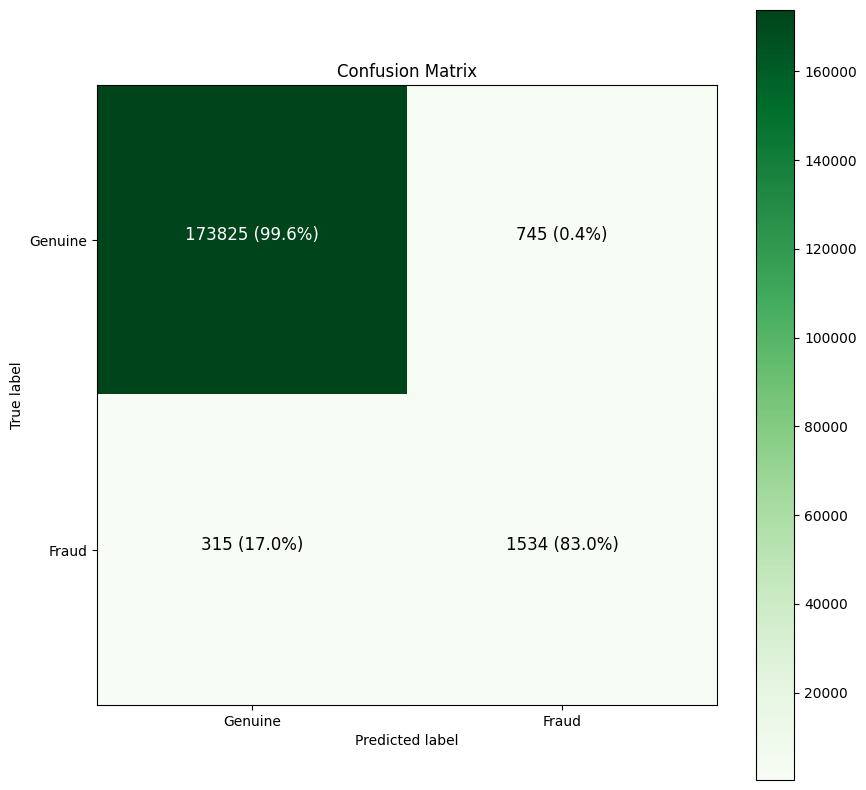

In [ ]:
%%time

model_2.set_params(**best_params) # assignig the best parmeters

model_2.fit(X_resampled,y_resampled) # making the model learn from the training sample

model_2_eval = evaluate_model(model_2,'model_2',model_2_spec,X_resampled, y_resampled) # evaluating the model using the funstion call

model_2_eval['best'] # print the best result

In [ ]:
import pickle

with open('model_2.pkl', 'wb' ) as file:
    pickle.dump(model_2,file)


In [ ]:
import pickle

with open('model_2_eval.pkl', 'wb' ) as file:
    pickle.dump(model_2_eval,file)

**Inference :** Model 2 is slightly better from model 1. but still continue the the short coming of the model 1

> **Model 3 : RandomForestClassifier**

- *Normal Hyperparameters*

CPU times: total: 1min 6s
Wall time: 17.1 s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
12,model_3,Train,0.4,92.73,86.34,99.84,85.58,92.17,Ransom Forest | Normal H-Params,364.49
0,model_3,Test,0.4,86.57,76.20,79.67,73.34,76.37,Ransom Forest | Normal H-Params,315.78


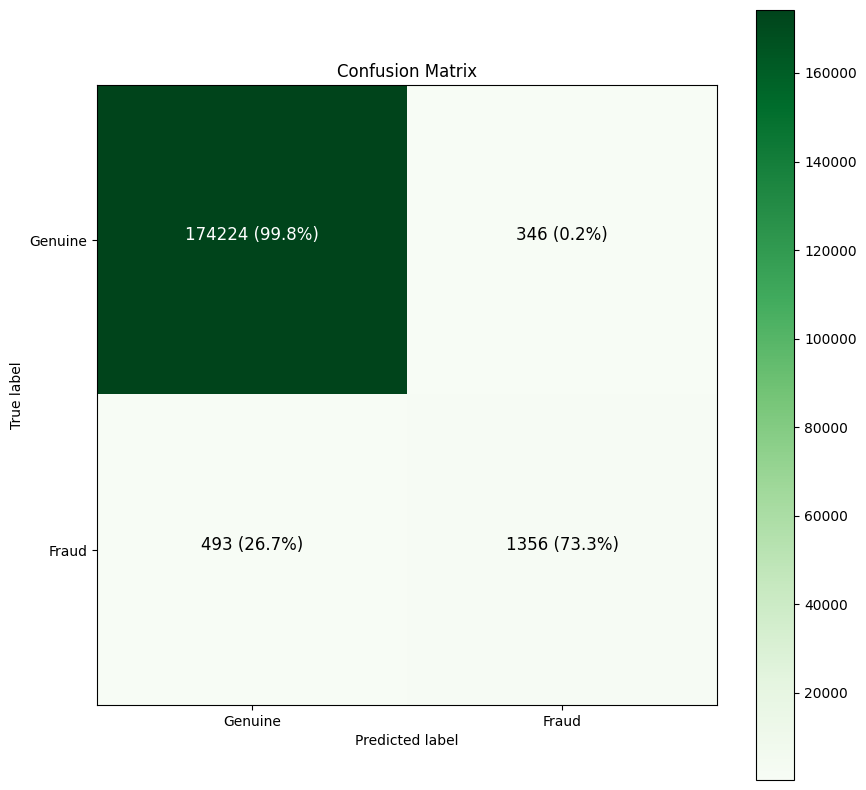

In [ ]:
%%time

model_3 = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split= 50, random_state=42, n_jobs = -1, class_weight = {0:20,1:1}) # creating the object

model_3_spec = 'Ransom Forest | Normal H-Params'

model_3.fit(X_resampled,y_resampled) # fitting on the trainig set

model_3_eval = evaluate_model(model_3,'model_3',model_3_spec,X_resampled, y_resampled) # evaluating the model by the function call

model_3_eval['best'] # printing the best results

In [ ]:
import pickle

with open('model_3_eval.pkl', 'wb' ) as file:
    pickle.dump(model_3_eval,file)

In [ ]:
import pickle

with open('model_2_eval.pkl', 'wb' ) as file:
    pickle.dump(model_3_eval,file)

**Inference :**

Model is overfitting . precison being is very low, being a major concern

> **Model 4 : RandomForestClassifier | Hyperparameter Tuning**

- *Optimized Hyperparameters*

> Defining the Hyperparameter space & Cross Valiadtion Scheme

In [ ]:
model_4_spec = 'Random Forest | Optimized H-Params'

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # cross validation scheme

model_4 = RandomForestClassifier(random_state=42, class_weight = {0:20,1:1}) # model object

# hyperparamer space

param_grid = {
    'n_estimators' : [100,200,300,500],
    'max_depth': [5,10,20],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10,20,30,50],
    'max_features': ['sqrt', 'log2']
    }

> Defing the search Object & Fitting on the hyperparameter-tuning-sample

In [ ]:


halving_search_rfc = HalvingRandomSearchCV(estimator = model_4,
                                      param_distributions = param_grid,
                                      cv = skf,
                                      scoring = 'roc_auc',
                                      refit = True,
                                      n_jobs = -1,
                                      random_state = 42)

halving_search_rfc.fit(X_hp_tuning,y_hp_tuning) # fitting

HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(class_weight={0: 20,
                                                                     1: 1},
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [5, 10, 20],
                                           'max_features': ['sqrt', 'log2'],
                                           'min_samples_leaf': [10, 20, 30, 50],
                                           'min_samples_split': [10, 20, 30],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      random_state=42, scoring='roc_auc')

> Accessing the best hyperparameters

In [ ]:
best_params = halving_search_rfc.best_params_
best_params

{'n_estimators': 500,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20}

> Lets Build model with training sample - by resetting into the best hyperparemeters

CPU times: total: 8min 19s
Wall time: 10min 3s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
14,model_4,Train,0.6,96.84,93.86,100.00,93.68,96.73,Random Forest | Optimized H-Params,384.38
0,model_4,Test,0.6,87.47,82.44,90.95,75.01,82.22,Random Forest | Optimized H-Params,335.87


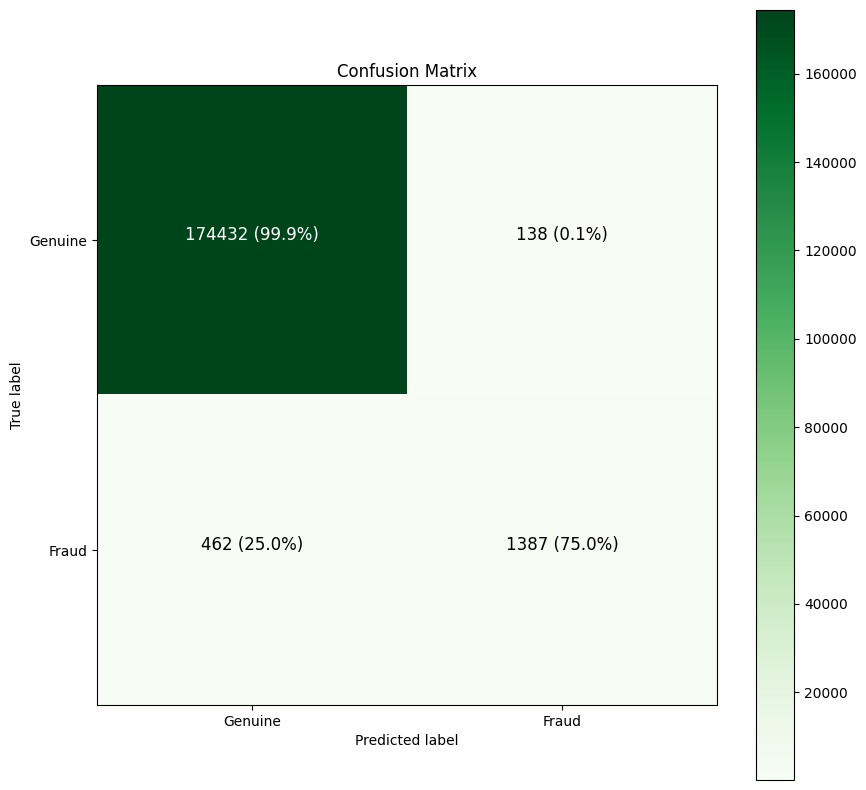

In [ ]:
%%time

model_4.set_params(**best_params) # assigning best parameters to the model

model_4.fit(X_resampled,y_resampled) # fitting on the training sample

model_4_eval = evaluate_model(model_4,'model_4',model_4_spec,X_resampled, y_resampled) # evaluating the model

model_4_eval['best'] # printing the best results

In [ ]:
import pickle

with open('model_4.pkl', 'wb' ) as file:
    pickle.dump(model_4,file)

In [ ]:
import pickle

with open('model_4_eval.pkl', 'wb' ) as file:
    pickle.dump(model_4_eval,file)

**Inference :**

> **Model 5 : XgBoost**

- *Normal Hyperparameters*

[13:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight", "loss", "min_samples_splits" } are not used.

CPU times: total: 2min 36s
Wall time: 27.6 s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
15,model_5,Train,0.8,92.89,86.63,99.84,85.92,92.36,XGBoost | Normal H-Params,365.28
0,model_5,Test,0.8,89.02,80.68,83.63,78.20,80.83,XGBoost | Normal H-Params,331.53


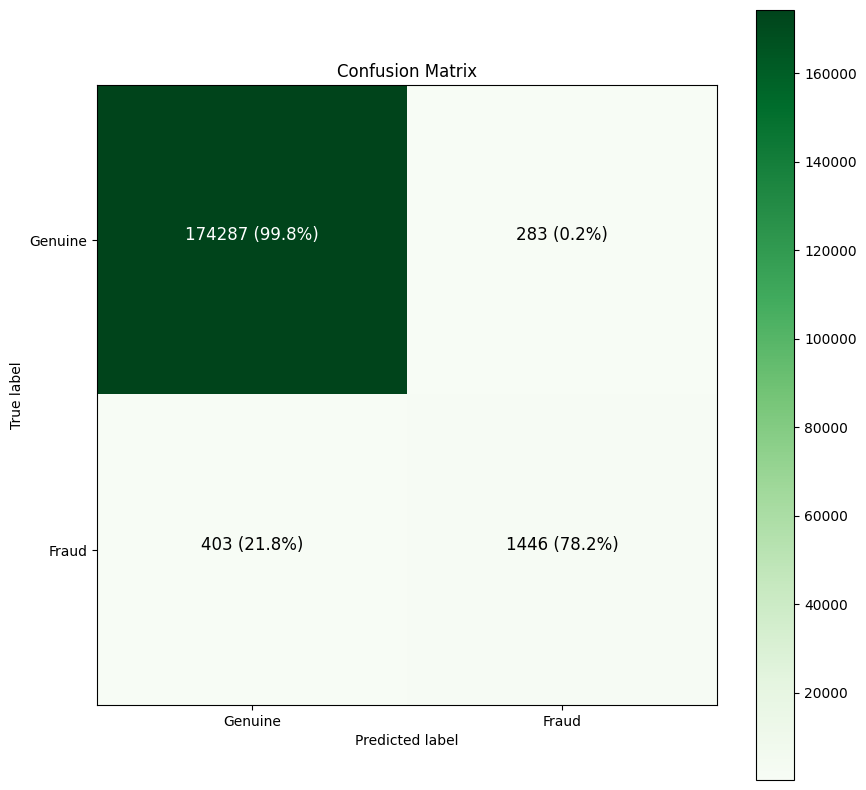

In [ ]:
%%time
model_5 = XGBClassifier(n_estimators = 100,
                        max_depth = 10,
                        learning_rate = 0.01,
                        min_samples_splits =30,
                        loss = 'deviance',
                        n_jobs = -1,
                        random_state = 42,class_weight = {0:20,1:1}) # create the object

model_5_spec = 'XGBoost | Normal H-Params'

model_5.fit(X_resampled,y_resampled) # fitting the training sample

model_5_eval = evaluate_model(model_5,'model_5',model_5_spec,X_resampled, y_resampled) # evaluating the model

model_5_eval['best'] # printing the best result

**Inference :** In terms of the roc_auc and recall, the model has improved by a big mark and does not overfitting in that aspect, but on the other side the precison being the real concern for the model ~ 11.5, which is very low.

In [ ]:
import pickle

with open('model_5_eval.pkl', 'wb' ) as file:
    pickle.dump(model_5_eval,file)

In [ ]:
import pickle

with open('model_5.pkl', 'wb' ) as file:
    pickle.dump(model_5,file)

> **Model 6 : XGBoost | Hyperparameter optimization**

- *Optimized hyperperameters*

- **Note :** For xgboost, there many hyperparameters which are continues in nature, let us use the bayesian search CV

- Reference Link : https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html

> Lets install scikit optimize using pip

In [ ]:
!pip install scikit-optimize
clear_output()

> Import the Bayesian SearchCV from scikit optimize

In [ ]:
from skopt import BayesSearchCV

> Lets define the hyperparameter space

In [ ]:
# For Bayesian search, the parameter space consist of range of hyperparamters

params_grid = {'n_estimators' : (50,300,'uniform'),
                'max_depth' : (4,10,'uniform'),
               'learning_rate' : (0.001,3.0,'log-uniform'),
               'min_samples_splits' : (0.001,0.999,'log-uniform'),
               'subsample': (0.5,1.0,'log-uniform'),
               'colsample_bytree':  (0.4,1.0,'log-uniform'),
               'colsample_bylevel':  (0.4,1.0,'log-uniform'),
               'loss' : ['exponential','deviance'],
               'reg_lambda': (0.1,100.0,'log-uniform'),
               'gamma': (0.25,1.0,'log-uniform'),
               'lambda' :(0.1,100.0,'log-uniform')
               }

In [ ]:
%%time

model_6 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # creating the object

model_6_spec = 'XGBoost | Opmtimize H-Params - Bayesian Search'

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # defining the cross validation scheme

search = BayesSearchCV(estimator = model_6,
                       search_spaces = params_grid,
                       optimizer_kwargs= {'base_estimator': 'GP'}, # Gaussian Process
                       n_iter = 10,
                       scoring = 'precision',
                       n_jobs = -1,
                       verbose = 1,
                       random_state = 42
                       )


search.fit(X_hp_tuning,y_hp_tuning) # fitting the search object with hyper-parameter-tuning-sample

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[13:39:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight", "loss", "min_samples_splits" } are not used.

CPU times: total: 2min 34s
Wall time: 9min 48s


BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None,
                                      class_weight={0: 20, 1: 1},
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None...
                             'colsample_bytree': (0.4, 1.0, 'log-uniform'),
                             'gamma': (0.25, 1.0, 'log-uniform'),
                             'lambda': (0.1, 100.0, 'log-uniform'),
                             'learning_rate': (0.001, 3.0, 'log-uniform'),
                             'loss': ['exponential', 'deviance'],
                             'max_depth': (4, 10, 'uniform'),
                             'min_samples_splits': (0.001, 0.999,
                                                    'log-uniform'),
                             'n_estimators': (50, 300, 'uniform'),
                             'reg_lambda': (0.1, 100.0, 'log-uniform'),
                             'subsample': (0.5, 1.0, 'log-uniform')},
              verbose=1)

> Lets access the best hyperparameters

In [ ]:
best_params = search.best_params_
best_params

OrderedDict([('colsample_bylevel', 0.8420635292835258),
             ('colsample_bytree', 0.46822496079668025),
             ('gamma', 0.5727963303428384),
             ('lambda', 25.603205585229382),
             ('learning_rate', 0.06587435368095368),
             ('loss', 'deviance'),
             ('max_depth', 9),
             ('min_samples_splits', 0.4144879333104471),
             ('n_estimators', 278),
             ('reg_lambda', 1.4467243548751343),
             ('subsample', 0.6335787009130003)])

> Lets Build model with training sample - by resetting into the best hyperparemeters

[13:39:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight", "loss", "min_samples_splits" } are not used.



CPU times: total: 4min 17s
Wall time: 40.9 s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
12,model_6,Train,0.6,99.85,99.71,99.98,99.73,99.85,XGBoost | Opmtimize H-Params - Bayesian Search,399.27
0,model_6,Test,0.6,91.76,84.40,85.47,83.67,84.56,XGBoost | Opmtimize H-Params - Bayesian Search,345.30


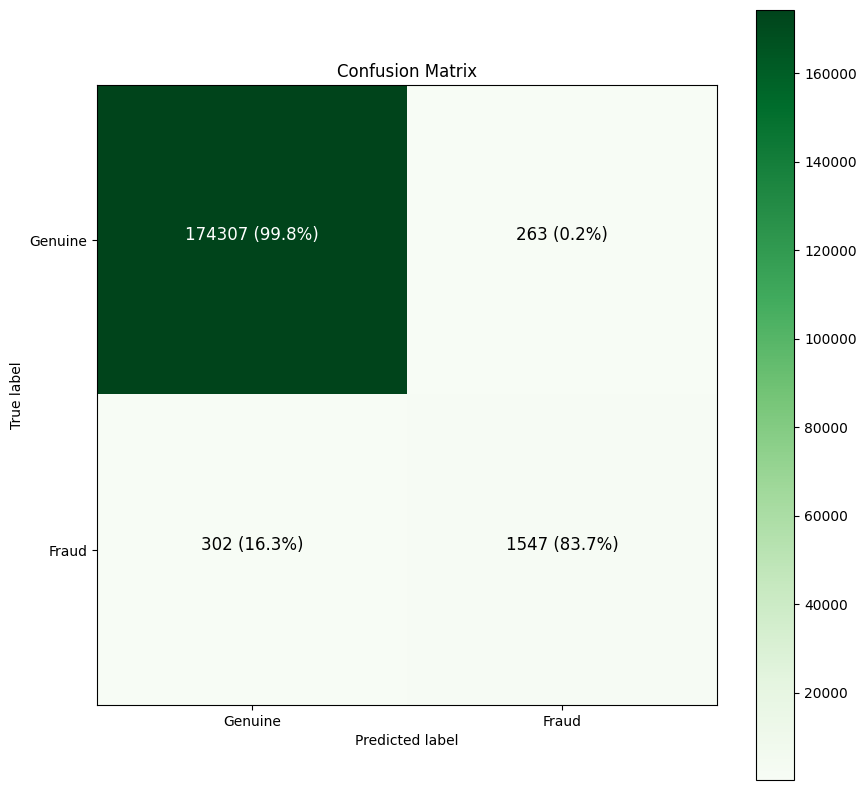

In [ ]:
%%time

model_6.set_params(**best_params) # assigning the best parameters to the model

model_6.fit(X_resampled, y_resampled) # fitting on the train_sample

model_6_eval = evaluate_model(model_6,'model_6',model_6_spec,X_resampled, y_resampled) # evaluating the model

model_6_eval['best'] # printing the best result

**Inference :**

> Compiling the results of all the above models for all threshold values

In [ ]:
import pickle

with open('model_6.pkl', 'wb' ) as file:
    pickle.dump(model_6,file)

In [ ]:
import pickle

with open('model_6_eval.pkl', 'wb' ) as file:
    pickle.dump(model_6_eval,file)

svc


WITH SEARCH

knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import randint

In [ ]:
param_grid = {
    'n_neighbors': randint(1, 30),  # Range of values for the number of neighbors
    'metric': ['euclidean', 'manhattan', 'mahalanobis'],  # List of distance metrics to try
    'weights': ['uniform', 'distance']  # Different weight options for neighbors
}

In [ ]:
model_8 = KNeighborsClassifier(n_neighbors=5, weights='uniform') # creating the object

model_8_spec = 'KNN | Opmtimize H-Params'

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # defining the cross validation scheme

search = HalvingRandomSearchCV(estimator=model_8,
                               param_distributions=param_grid,
                               n_candidates=10,
                               scoring='accuracy',
                               n_jobs=-1,
                               cv=skf,
                               random_state=42)

search.fit(X_hp_tuning,y_hp_tuning) # fitting the search object with hyper-parameter-tuning-sample

HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                      estimator=KNeighborsClassifier(), n_candidates=10,
                      n_jobs=-1,
                      param_distributions={'metric': ['euclidean', 'manhattan',
                                                      'mahalanobis'],
                                           'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002105E5E2FA0>,
                                           'weights': ['uniform', 'distance']},
                      random_state=42, scoring='accuracy')

In [ ]:
best_params = search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

CPU times: total: 7h 20min 53s
Wall time: 1h 2min 36s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
17,model_8,Train,0.9,100.00,100.00,100.00,100.00,100.00,KNN | Opmtimize H-Params,400.00
0,model_8,Test,0.9,78.17,44.55,35.67,57.44,44.01,KNN | Opmtimize H-Params,215.83


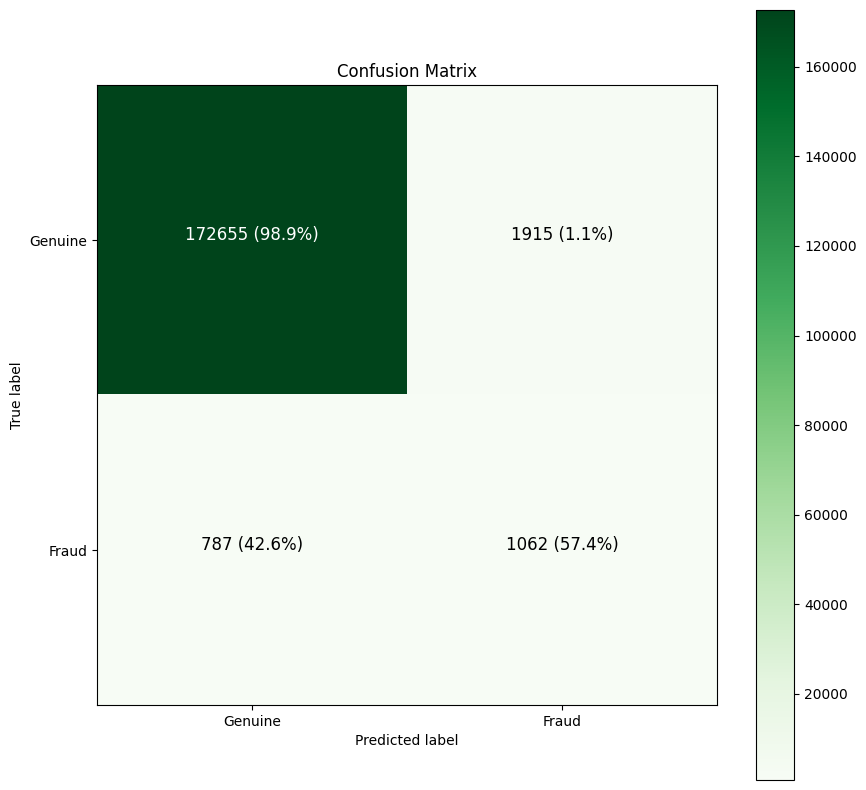

In [ ]:
%%time

model_8.set_params(**best_params) # assigning the best parameters to the model

model_8.fit(X_resampled, y_resampled) # fitting on the train_sample

model_8_eval = evaluate_model(model_8,'model_8',model_8_spec,X_resampled, y_resampled) # evaluating the model

model_8_eval['best'] # printing the best result

In [ ]:
import pickle

with open('model_8.pkl', 'wb' ) as file:
    pickle.dump(model_8,file)

In [ ]:
import pickle

with open('model_8_eval.pkl', 'wb' ) as file:
    pickle.dump(model_8_eval,file)

ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()  # Instantiate the decision tree classifier



In [ ]:
param_grid = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}


In [ ]:
model_9 = AdaBoostClassifier(base_estimator = dtc) # creating the object

model_9_spec = 'Adaboost | Opmtimize H-Params'

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # defining the cross validation scheme

search = grid_search = GridSearchCV(model_9 , param_grid, n_jobs = -1, cv = 5, verbose = 1)

search.fit(X_hp_tuning,y_hp_tuning) # fitting the search object with hyper-parameter-tuning-sample

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
best_params = search.best_params_
best_params

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}

CPU times: total: 10 s
Wall time: 11.8 s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
9,model_9,Train,0.3,100.00,100.00,100.00,100.00,100.00,Adaboost | Opmtimize H-Params,400.00
0,model_9,Test,0.3,92.76,62.04,45.14,86.64,59.36,Adaboost | Opmtimize H-Params,286.58


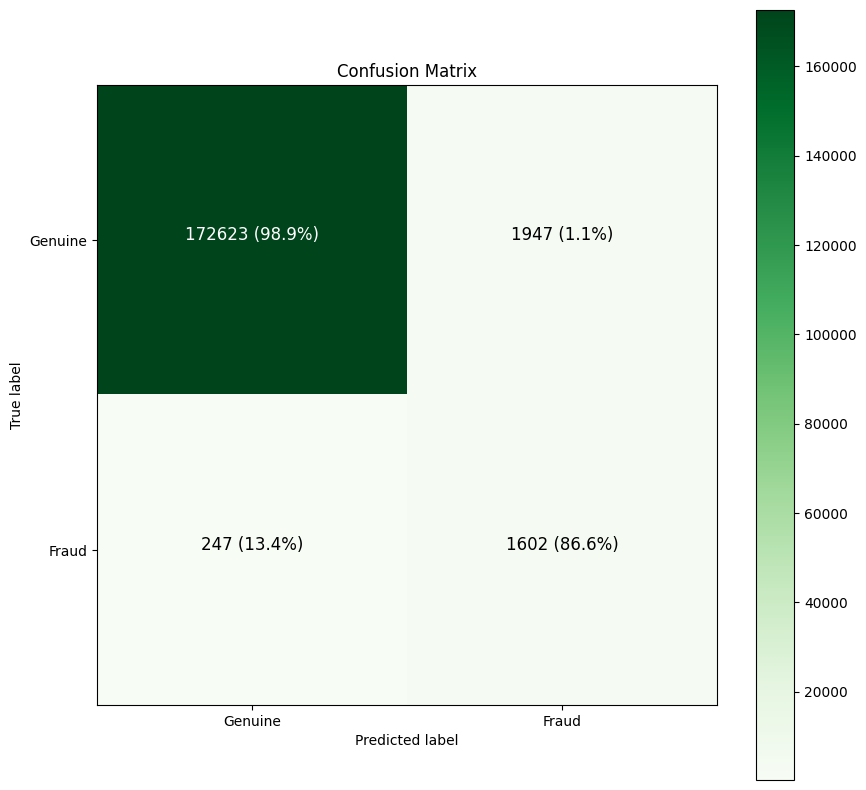

In [ ]:
%%time

model_9.set_params(**best_params) # assigning the best parameters to the model

model_9.fit(X_resampled, y_resampled) # fitting on the train_sample

model_9_eval = evaluate_model(model_9,'model_9',model_9_spec,X_resampled, y_resampled) # evaluating the model

model_9_eval['best'] # printing the best result

In [ ]:
import pickle

with open('model_9.pkl', 'wb' ) as file:
    pickle.dump(model_9,file)

In [ ]:
import pickle

with open('model_9_eval.pkl', 'wb' ) as file:
    pickle.dump(model_9_eval,file)

ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
14,model_10,Train,0.6,100.00,100.00,100.00,100.00,100.00,ExtraTreesClassifier | Normal H-Params,400.00
0,model_10,Test,0.6,89.18,82.93,87.99,78.47,82.96,ExtraTreesClassifier | Normal H-Params,338.57


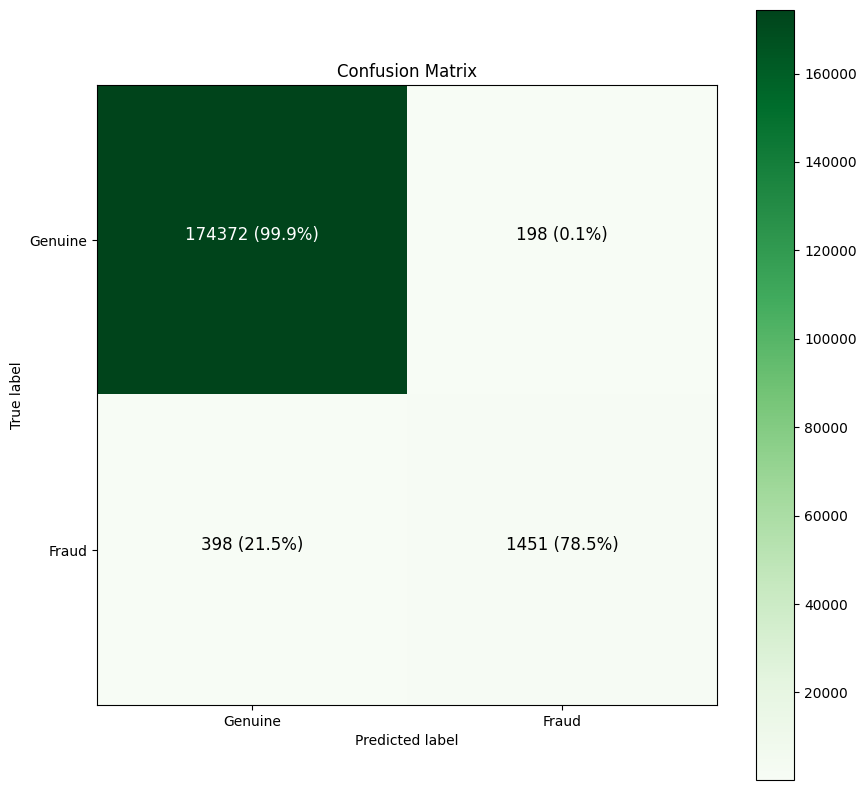

In [ ]:
model_10 = ExtraTreesClassifier() # create the object

model_10_spec = 'ExtraTreesClassifier | Normal H-Params'

model_10.fit(X_resampled,y_resampled) # fitting the training sample

model_10_eval = evaluate_model(model_10,'model_10',model_10_spec,X_resampled, y_resampled) # evaluating the model

model_10_eval['best'] # printing the best result

In [ ]:
import pickle

with open('model_10.pkl', 'wb' ) as file:
    pickle.dump(model_10,file)

In [ ]:
import pickle

with open('model_10_eval.pkl', 'wb' ) as file:
    pickle.dump(model_10_eval,file)

ann

In [ ]:
!pip install tensorflow


  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached charset_normalizer-3.1.0-cp39-cp39-win_amd64.whl (97 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3


ERROR: Cannot uninstall numpy 1.24.3, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.24.3'.


In [ ]:
!pip install chardet charset-normalizer

  Using cached charset_normalizer-3.1.0-cp39-cp39-win_amd64.whl (97 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiohttp 3.8.3 requires charset-normalizer<3.0,>=2.0, but you have charset-normalizer 3.1.0 which is incompatible.


In [ ]:
!pip install --upgrade charset-normalizer

In [ ]:
# Let's create the ANN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_11 = Sequential()
# Adding the input layer and first Hidden Layer
model_11.add(Dense(activation = "relu", input_dim = 26, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
model_11.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Adding the third hidden layer
model_11.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
model_11.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [ ]:
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 162       
                                                                 
 dense_9 (Dense)             (None, 20)                140       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the ANN
model_11.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
y_test=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\y_test.csv')
X_test=pd.read_csv(r'C:\Users\s.maghraoui\Desktop\Fraiud\X_test.csv')

In [ ]:
# Create a function for evaluating the model performance

from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

def evaluate_modelANN(model,model_id,model_spec,X_train,y_train,y_true = y_test, X_test = X_test):

  eval_table = pd.DataFrame()

  for thresh in np.arange(0.1,1,0.1):



    y_pred_train = (model.predict(X_train)[:, 0] > thresh).astype(int)
    y_pred_test = (model.predict(X_test)[:, 0] > thresh).astype(int)

    roc_auc_train = round(roc_auc_score(y_train,y_pred_train)*100,2)
    precision_train = round(precision_score(y_train,y_pred_train)*100,2)
    recall_train = round(recall_score(y_train,y_pred_train)*100,2)
    f1_train = round(f1_score(y_train,y_pred_train)*100,2)
    mcc_train =round(matthews_corrcoef(y_train,y_pred_train)*100,2)

    roc_auc_test = round(roc_auc_score(y_true,y_pred_test)*100,2)
    precision_test = round(precision_score(y_true,y_pred_test)*100,2)
    recall_test = round(recall_score(y_true,y_pred_test)*100,2)
    f1_test = round(f1_score(y_true,y_pred_test)*100,2)
    mcc_test =round(matthews_corrcoef(y_true,y_pred_test)*100,2)

    eval_dict = {'model_id':[model_id,model_id],'validation on':['Train','Test'],'threshold' : [thresh,thresh],'roc_auc' : [roc_auc_train,roc_auc_test],'mcc': [mcc_train,mcc_test],
                'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                'f1_score':[f1_train,f1_test],'desc':[model_spec,model_spec]}

    eval_table_iter = pd.DataFrame(eval_dict)

    eval_table = pd.concat([eval_table, eval_table_iter], axis = 0)

  eval_table['sort_weight'] = eval_table[['roc_auc','precision','recall', 'mcc']].sum( axis = 1)
  eval_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
  eval_table.reset_index(inplace = True, drop = True)

  test = eval_table[eval_table['validation on'] == 'Test']
  test.reset_index(inplace = True, drop = True)

  best_threshold = test.iloc[0]['threshold']

  best_eval = eval_table[eval_table['threshold'] == best_threshold]

  best_eval.sort_values(by = 'validation on', ascending = False, inplace = True)

  y_pred_test_best_threshold = (model.predict(X_test) > best_threshold).astype(int)

  make_confusion_matrix(y_true = y_true,y_pred = y_pred_test_best_threshold, classes = ['Genuine','Fraud'])

  result = {'all':eval_table, 'best':best_eval,'all_test': test}

  return result # return a dictionary, by using the key : 'all','best','all_test', we may access the relevent content

5514/5514 [==============================] - 4s 812us/step


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
17,model_11,Train,0.9,90.22,81.65,98.58,81.61,89.30,ANN | Normal H-Params,352.06
0,model_11,Test,0.9,88.37,57.24,42.94,77.83,55.35,ANN | Normal H-Params,266.38


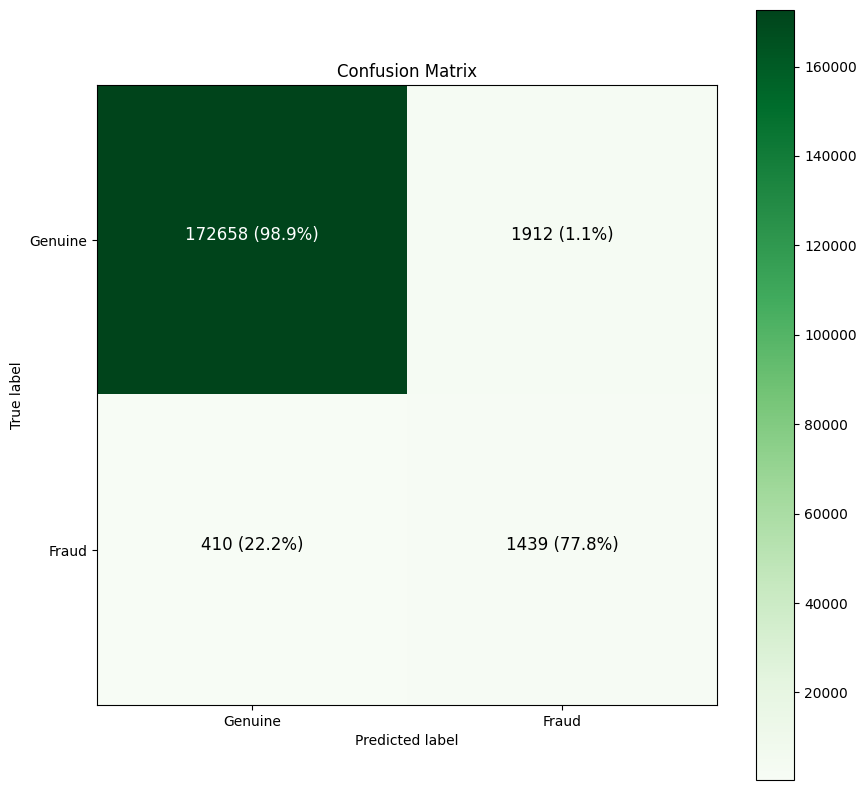

In [ ]:
model_11_spec = 'ANN | Normal H-Params'

model_11.fit(X_resampled,y_resampled) # fitting the training sample

model_11_eval = evaluate_modelANN(model_11,'model_11',model_11_spec,X_resampled, y_resampled, y_test, X_test) # evaluating the model

model_11_eval['best'] # printing the best result

In [ ]:
import pickle

with open('model_11.pkl', 'wb' ) as file:
    pickle.dump(model_11,file)

INFO:tensorflow:Assets written to: ram://93bdf4e9-3f4d-48c3-877a-b71521a31d69/assets


In [ ]:
import pickle

with open('model_11_eval.pkl', 'wb' ) as file:
    pickle.dump(model_11_eval,file)

In [ ]:
eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'], model_7_eval['all_test'], model_8_eval['all_test'],
             model_9_eval['all_test'], model_10_eval['all_test'],model_11_eval['all_test']]

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(30)

NameError: name 'model_7_eval' is not defined

**Inference :**

This is very clear that `model 6 being the pick of the models` in terms of generalisation.

> **Lets train the model in X_train in the entirelty without downsampleing**

> **Model 7 | Pick of the Model on Entire Train Data**

- XGBoost is the pick of the models

- *Hyperparameter arrived in model 6 with bayesian search CV*

- *Training on SMOTE Sample , without downsampling the the majority class*

- Create a SMOTE Sample without without downsampling the majority class

> Check the shape of the Orginal Train sample before sampling balance

In [ ]:
print(X_train.shape,y_train.shape,'\n')

print(y_train.value_counts(normalize = True))

> Import the SMOTE class from the imblearn and create a smote object

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [ ]:
X_train_full, y_train_full = smote.fit_resample(X_train,y_train)

In [ ]:
print(X_train_full.shape,y_train_full.shape,'\n')

print(y_train_full.value_counts(normalize = True))

(811592, 26) (811592, 1) 

is_fraud
0           0.5
1           0.5
Name: proportion, dtype: float64


> Train the model on smote Sample on entirety

[12:17:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "algorithm", "class_weight" } are not used.

CPU times: total: 9min 38s
Wall time: 1min 33s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
15,model_12,Train,0.8,92.97,86.76,99.80,86.11,92.45,XGBoost | Pick Model Train on All Data,365.64
0,model_12,Test,0.8,89.39,80.16,81.79,78.96,80.35,XGBoost | Pick Model Train on All Data,330.30


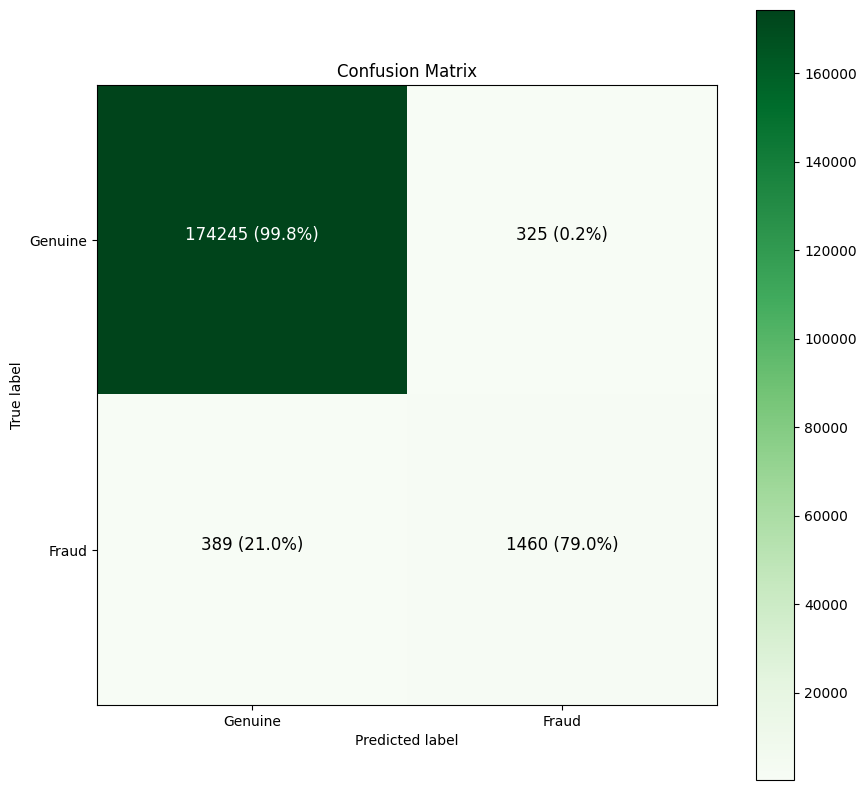

In [ ]:
%%time

model_12 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # Creating the object

model_12_spec = 'XGBoost | Pick Model Train on All Data'

model_12.set_params(**best_params) # Best hyperparameters from the model 6 arrived by bayesian search

model_12.fit(X_train_full, y_train_full) # Fitting on entire data with smote without downsampling

model_12_eval = evaluate_model(model_12,'model_12',model_12_spec,X_train_full, y_train_full) # evaluating the model

model_12_eval['best'] # printing the best result

> **Let look at the perforrmance in all threshold values**

In [ ]:
model_12_eval['all_test']

,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
0,model_12,Test,0.8,89.39,80.16,81.79,78.96,80.35,XGBoost | Pick Model Train on All Data,330.30
1,model_12,Test,0.7,92.24,77.20,70.71,84.86,77.14,XGBoost | Pick Model Train on All Data,325.01
2,model_12,Test,0.9,85.03,78.91,89.20,70.15,78.53,XGBoost | Pick Model Train on All Data,323.29
3,model_12,Test,0.6,93.81,69.56,55.35,88.37,68.07,XGBoost | Pick Model Train on All Data,307.09
4,model_12,Test,0.5,95.42,53.46,31.54,92.97,47.10,XGBoost | Pick Model Train on All Data,273.39
5,model_12,Test,0.4,95.87,45.76,22.88,95.13,36.89,XGBoost | Pick Model Train on All Data,259.64
6,model_12,Test,0.3,95.33,34.19,12.92,97.62,22.82,XGBoost | Pick Model Train on All Data,240.06
7,model_12,Test,0.2,93.02,25.64,7.66,98.65,14.21,XGBoost | Pick Model Train on All Data,224.97
8,model_12,Test,0.1,80.21,12.55,2.61,99.95,5.08,XGBoost | Pick Model Train on All Data,195.32


> **Lets look the comparison of all models till model 7**

In [ ]:
eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],model_7_eval['all_test'],model_8_eval['all_test'],
             model_9_eval['all_test'], model_10_eval['all_test'],model_11_eval['all_test'],model_12_eval['all_test']]

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)

NameError: name 'model_2_eval' is not defined

**Inference :**

Still it looks like Model 6 wins the race. we can train the same model in ADASYN Sample in full.

> **Model 8 : Pick of Models | Pick Model Train on All Data - ADASYN Sample**

- create adasyn sample
- train the model

> Create adasyn sample

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN() # create the adsyn object

X_train_full_adasyn, y_train_full_adasyn = adasyn.fit_resample(X_train,y_train) # create adasyn oversampling without down sampling

print(X_train_full_adasyn.shape,y_train_full_adasyn.shape,'\n')

print(y_train_full_adasyn.value_counts(normalize = True))

(811771, 26) (811771, 1) 

is_fraud
1           0.50011
0           0.49989
Name: proportion, dtype: float64


> Train the model on Adasyn Sample on entirety

[12:28:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "algorithm", "class_weight" } are not used.

CPU times: total: 9min 15s
Wall time: 1min 25s


,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
15,model_13,Train,0.8,90.17,81.85,99.70,80.57,89.12,XGBoost | Pick Model Train on All Data,352.29
0,model_13,Test,0.8,89.92,78.12,76.66,80.10,78.34,XGBoost | Pick Model Train on All Data,324.80


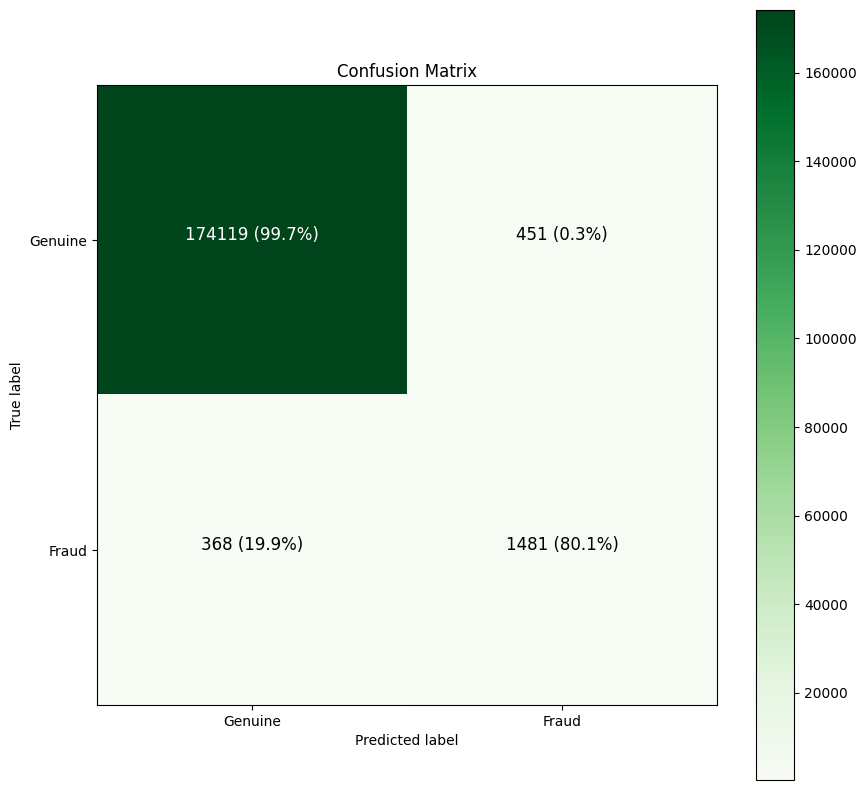

In [ ]:
%%time

model_13 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # Creating the object

model_13_spec = 'XGBoost | Pick Model Train on All Data'

model_13.set_params(**best_params) # Best hyperparameters from the model 6 arrived by bayesian search

model_13.fit(X_train_full_adasyn, y_train_full_adasyn) # Fitting on entire data with smote without downsampling

model_13_eval = evaluate_model(model_13,'model_13',model_13_spec,X_train_full_adasyn, y_train_full_adasyn) # evaluating the model

model_13_eval['best'] # printing the best result

> **Let look at all the threshold outcomes**

In [ ]:
model_13_eval['all_test']

,model_id,validation on,threshold,roc_auc,mcc,precision,recall,f1_score,desc,sort_weight
0,model_13,Test,0.8,89.92,78.12,76.66,80.10,78.34,XGBoost | Pick Model Train on All Data,324.80
1,model_13,Test,0.9,85.75,79.23,88.09,71.61,79.00,XGBoost | Pick Model Train on All Data,324.68
2,model_13,Test,0.7,92.68,72.05,60.97,85.94,71.34,XGBoost | Pick Model Train on All Data,311.64
3,model_13,Test,0.6,95.28,59.87,39.66,92.05,55.44,XGBoost | Pick Model Train on All Data,286.86
4,model_13,Test,0.5,95.87,48.10,25.28,94.70,39.90,XGBoost | Pick Model Train on All Data,263.95
5,model_13,Test,0.4,95.74,38.07,15.88,96.92,27.29,XGBoost | Pick Model Train on All Data,246.61
6,model_13,Test,0.3,94.29,28.91,9.45,98.59,17.24,XGBoost | Pick Model Train on All Data,231.24
7,model_13,Test,0.2,90.91,21.43,5.62,99.51,10.64,XGBoost | Pick Model Train on All Data,217.47
8,model_13,Test,0.1,78.58,11.75,2.42,99.73,4.73,XGBoost | Pick Model Train on All Data,192.48


> **Lets look the comparison of all models till model 8**

In [ ]:
eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],model_7_eval['all_test'],model_8_eval['all_test'],
             model_9_eval['all_test'], model_10_eval['all_test'],model_11_eval['all_test'],model_12_eval['all_test'], model_13_eval['all_test']]

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)

NameError: name 'model_2_eval' is not defined

**Inference :**

It is very clear that, model6, mode8,model7 are the top model in terms of generalisation,

-- **We can try a hybrid model (Ensemble chain model)**

> **Model 9 : Ensemble-Chain Model | Output : Logistic Regression**

- Create function to fit and evaluate the ensemble models
- define input models
- Define outmodel
- Call the initail function and Evaluate

> **Create a function to run the ensemble models**

In [ ]:
def hybrid_model_evaluate(input_estimators, output_estimator,model_id,model_spec,X_train,y_train,X_test = X_test, y_test = y_test):

  p1_train = input_estimators[0].predict_proba(X_train)[:,1].ravel() # model predicting the probability of the input model1 in the train dataset
  p2_train = input_estimators[1].predict_proba(X_train)[:,1].ravel() # predicting the probability of the input model2 in the train dataset
  p3_train = input_estimators[2].predict_proba(X_train)[:,1].ravel() # predicting the probability of the input model3 in the train dataset

  p1_test = input_estimators[0].predict_proba(X_test)[:,1].ravel() # predicting the probability of the input model1 in the test dataset
  p2_test = input_estimators[1].predict_proba(X_test)[:,1].ravel() # predicting the probability of the input model2 in the test dataset
  p3_test = input_estimators[2].predict_proba(X_test)[:,1].ravel() # predicting the probability of the input model3 in the test dataset

  X_ensemble_train = np.column_stack((p1_train, p2_train, p3_train)) # creating the features for the output model in the train set
  X_ensemble_test = np.column_stack((p1_test, p2_test, p3_test)) # creating the features for the output model in the train set

  output_estimator.fit(X_ensemble_train,y_train) # fitting on the training set

  pred_proba_train = output_estimator.predict_proba(X_ensemble_train)[:,1].ravel() # output model predicting the probability on the train set
  pred_proba_test = output_estimator.predict_proba(X_ensemble_test)[:,1].ravel() # output model predicting the probability on the test set

  eval_table = pd.DataFrame()

  for thresh in np.arange(0.1,1,0.1):

    y_pred_train_out = (pred_proba_train > thresh).astype(int)
    y_pred_test_out = (pred_proba_test > thresh).astype(int)

    roc_auc_train = round(roc_auc_score(y_train,y_pred_train_out)*100,2)
    precision_train = round(precision_score(y_train,y_pred_train_out)*100,2)
    recall_train = round(recall_score(y_train,y_pred_train_out)*100,2)
    f1_train = round(f1_score(y_train,y_pred_train_out)*100,2)

    roc_auc_test = round(roc_auc_score(y_test,y_pred_test_out)*100,2)
    precision_test = round(precision_score(y_test,y_pred_test_out)*100,2)
    recall_test = round(recall_score(y_test,y_pred_test_out)*100,2)
    f1_test = round(f1_score(y_test,y_pred_test_out)*100,2)

    eval_dict = {'model_id':[model_id,model_id],'validation on':['Train','Test'],'threshold' : [thresh,thresh],'roc_auc' : [roc_auc_train,roc_auc_test],
                'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                'f1_score':[f1_train,f1_test],'desc':[model_spec,model_spec]}

    eval_table_iter = pd.DataFrame(eval_dict)

    eval_table = pd.concat([eval_table, eval_table_iter], axis = 0)

  eval_table['sort_weight'] = eval_table[['roc_auc','precision','recall']].sum( axis = 1)
  eval_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
  eval_table.reset_index(inplace = True, drop = True)

  test = eval_table[eval_table['validation on'] == 'Test']
  test.reset_index(inplace = True, drop = True)

  best_threshold = test.iloc[0]['threshold']

  best_eval = eval_table[eval_table['threshold'] == best_threshold]

  best_eval.sort_values(by = 'validation on', ascending = False, inplace = True)

  y_pred_test_best_threshold = (output_estimator.predict_proba(X_ensemble_test)[:,1] > best_threshold).astype(int)

  make_confusion_matrix(y_true = y_test,y_pred = y_pred_test_best_threshold, classes = ['Genuine','Fraud'])

  result = {'all':eval_table, 'best':best_eval,'all_test': test}

  return result # return a dictionary, by using the key : 'all','best','all_test', we may access the relevent content


> Define the input and output Estimators & Evaluate the Model through the Function Call

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
16,model_14,Train,0.9,96.27,99.42,93.09,96.15,"Hybrid Model 1 | Model6,12,13 + Output : Logit",288.78
0,model_14,Test,0.9,93.09,59.93,86.80,70.91,"Hybrid Model 1 | Model6,12,13 + Output : Logit",239.82


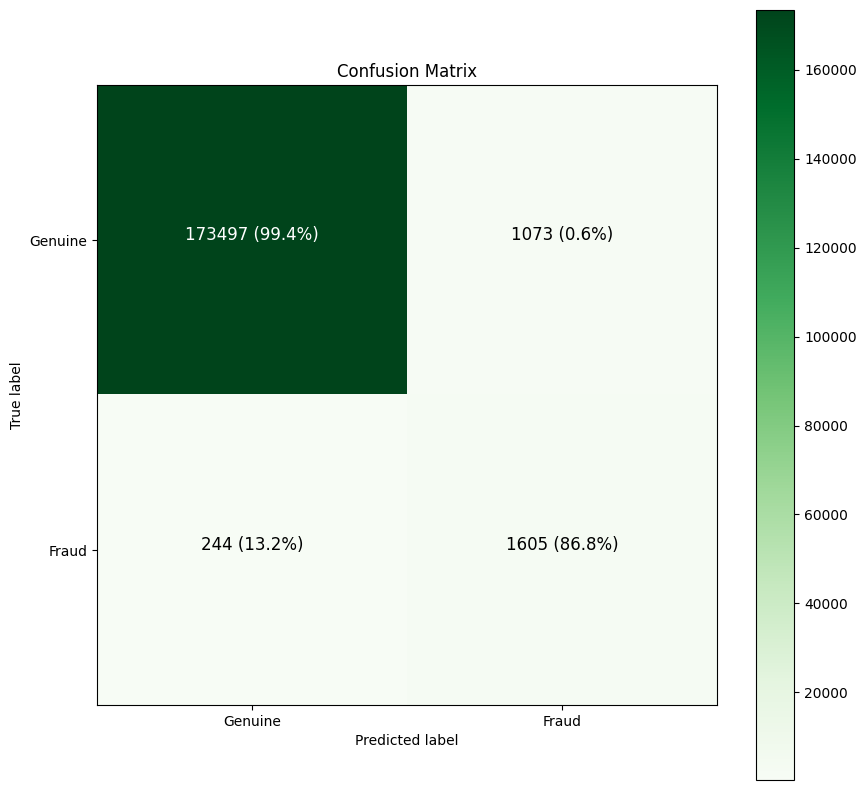

In [ ]:
from sklearn.linear_model import LogisticRegression

model_14_spec = 'Hybrid Model 1 | Model6,12,13 + Output : Logit'

input_estimators = [model_6,model_12,model_13]

output_estimator = LogisticRegression()

model_14_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_14',model_spec = model_14_spec,X_train = X_resampled,y_train = y_resampled)

model_14_eval['best']

> **Model 10 : Ensemble-Chain Model | Output : Logistic Regression with L1**

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
16,model_15,Train,0.9,96.27,99.42,93.09,96.15,"Hybrid Model 2 | Model6,12,13 + Output : Logit...",288.78
0,model_15,Test,0.9,93.09,59.91,86.80,70.89,"Hybrid Model 2 | Model6,12,13 + Output : Logit...",239.80


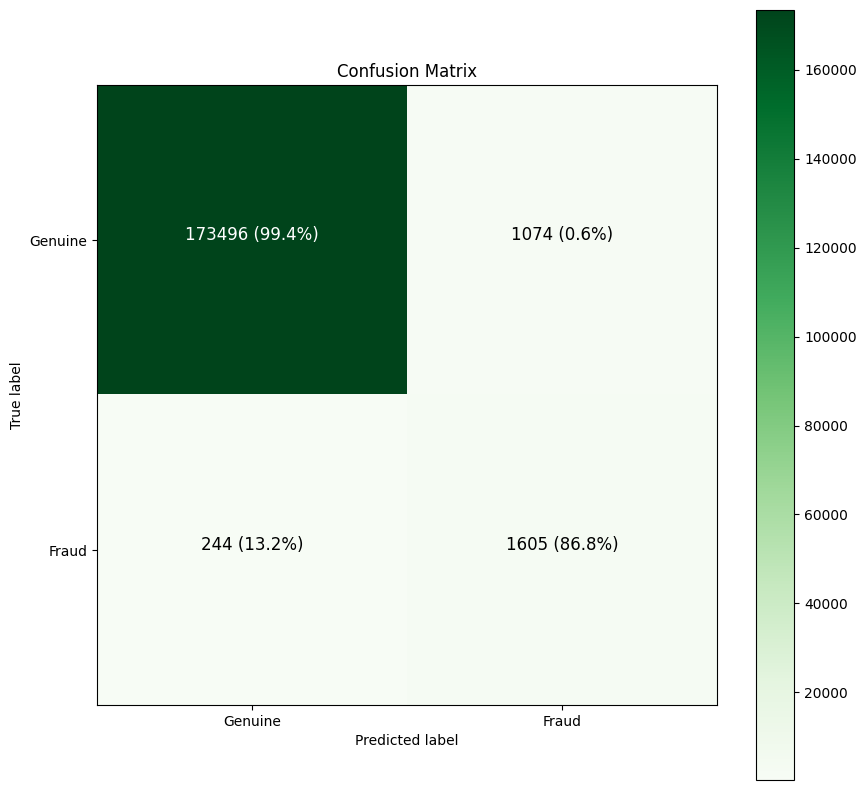

In [ ]:
from sklearn.linear_model import LogisticRegression

model_15_spec = 'Hybrid Model 2 | Model6,12,13 + Output : Logit with L1'

input_estimators = [model_6,model_12,model_13]

output_estimator = LogisticRegression(penalty="l1", C = 0.3,solver="saga")

model_15_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_15',model_spec = model_15_spec,X_train = X_resampled,y_train = y_resampled)

model_15_eval['best']

> **Model 11 : Ensemble-Chain Model | Output : Logistic Regression with L2**

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
16,model_16,Train,0.9,96.27,99.41,93.08,96.14,"Hybrid Model 3 | Model6,12,13 + Output : Logit...",288.76
0,model_16,Test,0.9,93.04,59.68,86.70,70.69,"Hybrid Model 3 | Model6,12,13 + Output : Logit...",239.42


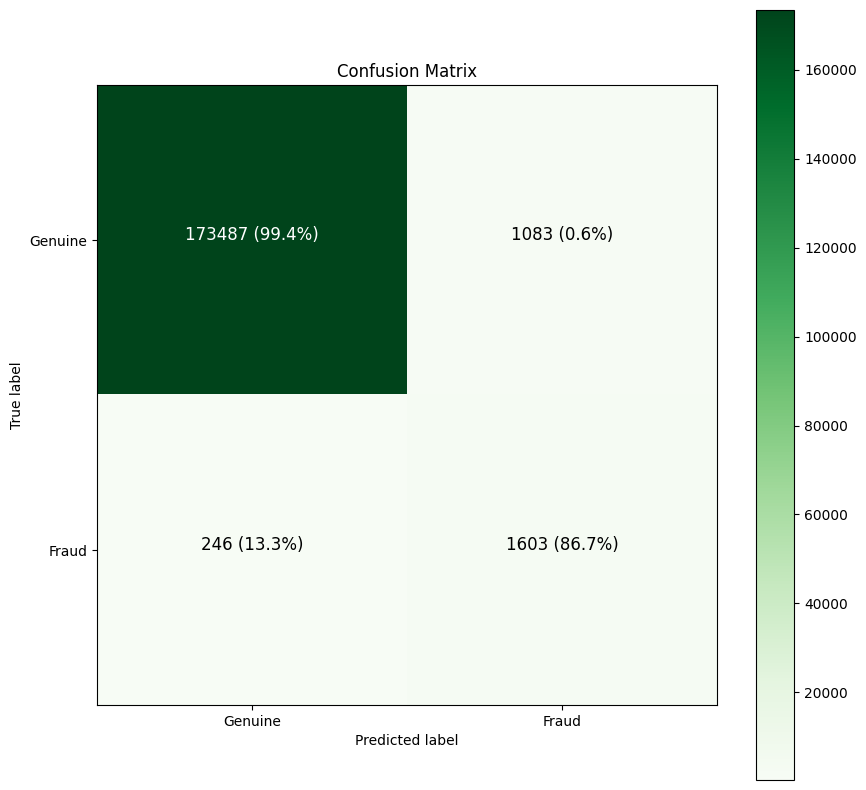

In [ ]:
from sklearn.linear_model import LogisticRegression

model_16_spec = 'Hybrid Model 3 | Model6,12,13 + Output : Logit with L2'

input_estimators = [model_6,model_12,model_13]

output_estimator = LogisticRegression(penalty="l2", C = 0.3,solver="saga")

model_16_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_16',model_spec = model_16_spec,X_train = X_resampled,y_train = y_resampled)

model_16_eval['best']

> **Model 12 : Ensemble-Chain Model | Output : RandomForestClassifier**

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
11,model_17,Train,0.9,97.62,97.99,97.23,97.61,"Hybrid Model 3 | Model6,12,13 + Output : Rando...",292.84
0,model_17,Test,0.9,95.18,32.17,92.43,47.72,"Hybrid Model 3 | Model6,12,13 + Output : Rando...",219.78


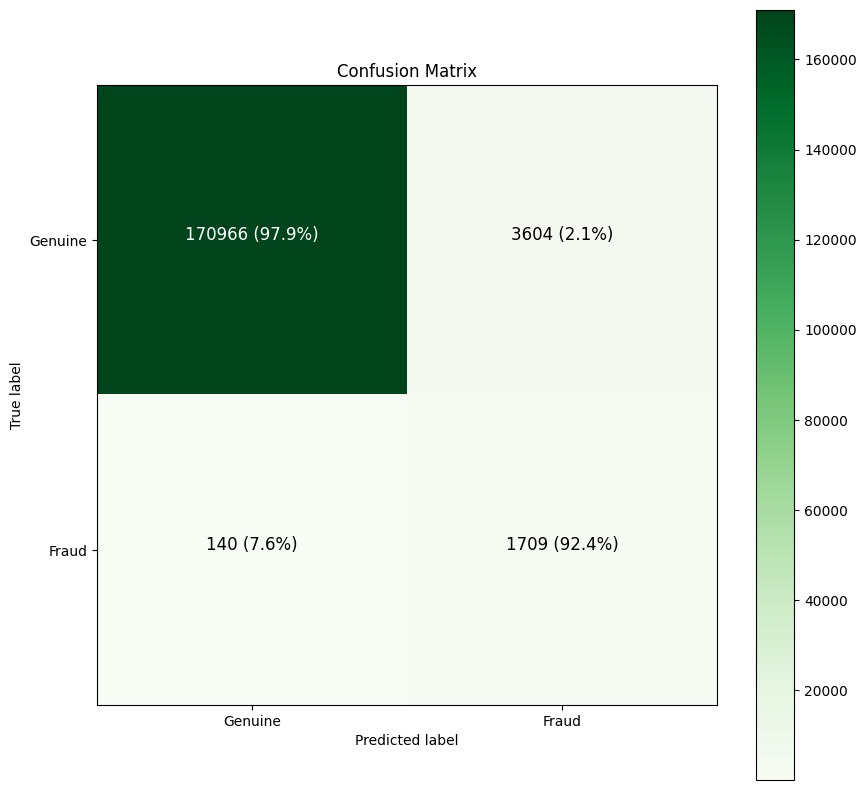

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_17_spec = 'Hybrid Model 3 | Model6,12,13 + Output : RandomForest'

input_estimators = [model_6,model_12,model_13]

output_estimator = RandomForestClassifier(n_estimators = 50, max_depth = 1)

model_17_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_17',model_spec = model_17_spec,X_train = X_resampled,y_train = y_resampled)

model_17_eval['best']

> **10. Choosing the best Model**

- Compare the models
- Choosing the best model
- Display the model
- Print the feature importances

> **Criteria**

- **We may choose the model with high `roc_auc` with given that model model should be having decent `precision` and `recall`**

> **Lets compare all the model been build till now**

In [ ]:
# list of all the model-eval tables

eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],
             model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],
             model_7_eval['all_test'],model_8_eval['all_test'],model_9_eval['all_test'],
             model_10_eval['all_test'],model_11_eval['all_test'],model_12_eval['all_test'],
             model_13_eval['all_test'],model_14_eval['all_test'],model_15_eval['all_test'],
             model_16_eval['all_test'],model_17_eval['all_test'],model_18_eval['all_test']]

# sorting and printing the best models
# sorting the model in way that it provided best combined value of 'roc_auc', 'precision' and 'recall'

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)




> **Final Model:**

- From the aboev table it is evident that the `model 9 & model 6` having the same features and efficiency.

- **Considerig the complexity, ease of implementation, we can choose the `model 6` as the final model to choose with `threshold = 0.6`**

> Displaying the final model

In [ ]:
print('\nProbability Threshold :', 0.6,'\n') # print the threshold value for the best result

model_6 # print the model object


Probability Threshold : 0.6 



XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 20, 1: 1}, colsample_bylevel=0.8420635292835258,
              colsample_bynode=None, colsample_bytree=0.46822496079668025,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5727963303428384,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=25.603205585229382,
              learning_rate=0.06587435368095368, loss='deviance', max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_splits=0.4144879333104471,
              missing=nan, monotone_constraints=None, n_estimators=278, ...)

> Lets look at the feature importance

In [ ]:
importances = model_6.feature_importances_ # access the feature importances from the best model

feature_importance = pd.DataFrame({'variable':X_train.columns, 'importances':importances})

feature_importance # print the feature importances

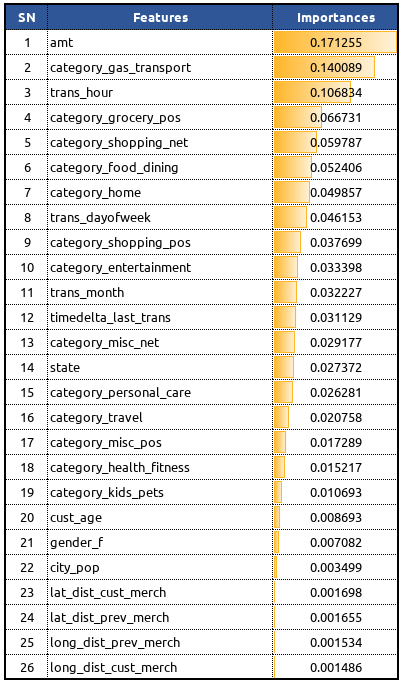